**Задание 2.**
# 2. МЕТОДЫ ИССЛЕДОВАНИЯ ВРЕМЕННЫХ РЯДОВ

Исследовательским методам анализа временных рядов посвящены два раздела. В первом из них мы будем рассматривать общие инструменты анализа данных, часто применяемые для исследования временных рядов. В частности, вы узнаете об изучении временных рядов с помощью гистограмм, графиков и функций группировки.

Второй раздел посвящен специальным методам анализа временных рядов — разработанным исключительно для обработки временных рядов и применимых только к данным с временной связью (в отличие от данных с перекрестными связями).


2.1 ОБЩИЕ МЕТОДЫ ИССЛЕДОВАНИЯ ВРЕМЕННЫХ РЯДОВ

Свои изыскания начнем с изучения принципов адаптации наиболее распространенных методов анализа данных к временным рядам. Этот процесс аналогичен обработке данных, лишенных временной зависимости.

Вам предстоит научиться распознавать столбцы, диапазоны значений и логические взаимосвязи между ними. В процессе анализа временных рядов вам нужно будет ответить на такие же вопросы, как и при исследовании любого другого набора данных.


* Существуют ли в наборе данных взаимосвязанные столбцы?
* Каково среднее значение изучаемой величины? Какова его дисперсия?

Чтобы ответить на них, вы можете обратиться к общеизвестным методам и инструментам — графикам, сводным статистикам, гистограммам и диаграммам рассеяния. Кроме того, необходимо предельно точно определить временные характеристики набора данных, ответив на следующие вопросы.

* Изменяется ли диапазон доступных значений с изменением временного периода или другой подвергаемой анализу характеристики?
* Являются ли данные однородными и логически взаимосвязанными или же предполагают временные изменения в способах измерения или в поведении?



Чтобы правильно ответить на поставленные вопросы, в ходе анализа данных с помощью упомянутых выше инструментов — гистограмм, диаграмм рассеяния и сводных статистик — нужно обязательно учитывать временные изменения исследуемых величин. Следовательно, в дальнейших статистических вычислениях время должно быть представлено отдельной осью на графиках и группой — в групповых операциях — на гистограммах и диаграммах рассеяния.


Оставшуюся часть раздела мы посвятим нескольким исследовательским методам анализа временных рядов. В процессе дальнейших изысканий мы постараемся определить, можно ли применять к временным рядам традиционные, не учитывающие временные изменения в данных, аналитические методы напрямую или только после соответствующей модификации. Для более наглядной демонстрации будем исследовать целевые методы на данных европейских фондовых рынков, получаемых с помощью базовых инструментов языка R

*Операции группировки*

Во временных рядах, как и в данных, лишенных временных связей, можно выделить отдельные группы значений, поэтому перед анализом такие данные можно подвергнуть самым разным операциям группировки. Например, в перекрестных данных операции группировки позволяют определить средние значения для значений возраста, пола или места проживания респондентов. В анализе временных рядов востребованы групповые операции, позволяющие рассчитывать основные статистические показатели наборов, например, среднемесячные или недельные медианы. Более того, правильно проведенная группировка значений поможет проанализировать наборы данных, обладающих одновременно не только временными, но и другими типами связей. Например, анализируя медицинский набор данных, вы сможете определить такие важные характеристики, как среднемесячное количество калорий, потребленных пациентами обоих полов, а также среднее за неделю время сна в каждой возрастной группе. Существует большое количество способов использования операций группировки данных для определения связей временных рядов с остальными данными набора.


* Вы можете анализировать данные разных периодов отдельно, если знаете, что между ними нет однозначных зависимостей. Применяйте исследовательские методики для определения таких разрозненных временных периодов в исходном наборе данных.
* Данные одного временного ряда (в частности, о поступлении добровольных взносов) зачастую становятся более понятными при разделении на несколько параллельных временных рядов (например, о поступлении взносов от отдельных респондентов).

*Построение графиков*

Рассмотрим типичный временной ряд, представленный в языке R набором данных EuStockMarkets. Чтобы понять его, внимательно изучим заголовок набора данных.

In [1]:
head (EuStockMarkets)

,DAX,SMI,CAC,FTSE
1991.496,1628.75,1678.1,1772.8,2443.6
1991.500,1613.63,1688.5,1750.5,2460.2
1991.504,1606.51,1678.6,1718.0,2448.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.512,1618.16,1686.6,1723.1,2484.7
1991.515,1610.61,1671.6,1714.3,2466.8


Это встроенный набор данных, относящийся к стандартной библиотеке языка R, который содержит сведения о ежедневных ценах закрытия четырех основных европейских фондовых индексов, указанных с 1991 по 1998 год. Значения в нем приведены только для торговых (биржевых) дней.

Этот набор данных подготовлен лучше, чем все рассматриваемые ранее, — он правильно собран и отформатирован. Нам не нужно беспокоиться о пропущенных значениях, часовых поясах или неправильных измерениях; можем сразу же переходить к исследованию данных.

Наши первые шаги по изучению данных будут такими же, как при анализе рядов, лишенных выраженной временной зависимости, хотя ничто не запрещает рассматривать временные ряды как перекрестные данные, обладающие временными связями. Чтобы получить представление об исследуемых величинах, представим их на отдельных графиках. Сравните такой подход с принятым при визуализации перекрестных данных, в котором каждый отдельный график представляет зависимость рассматриваемого признака от индекса, указывающего только порядок сбора или получения значений с сервера (иначе говоря, произвольный порядок), но не предоставляющий сведений о самих данных. Однако в случае временных рядов графики (рис. 2.1) становятся весьма информативным инструментом анализа данных.

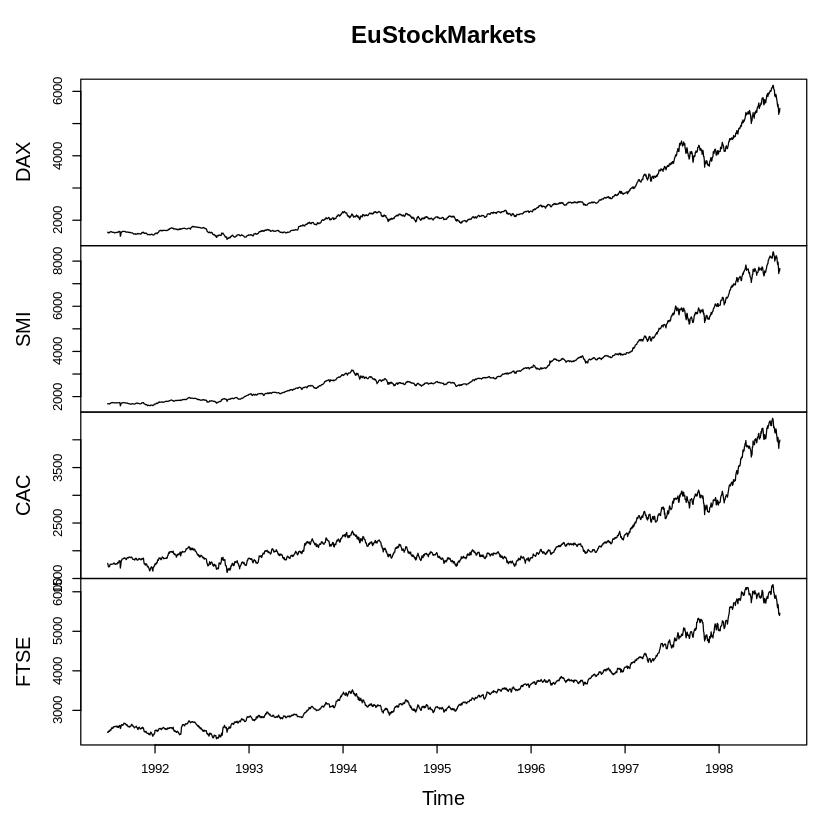

In [2]:
plot(EuStockMarkets)

*Рис. 2.1. Простой график временного ряда*

Обратите внимание на то, что перед визуализацией с помощью простой команды plot() данные автоматически разделяются на несколько временных рядов. И все благодаря использованию в языке R встроенного объекта mts (в противоположность объекту ts, обеспечивающего визуализацию только одного временного ряда).


In [3]:
class (EuStockMarkets)

[1] "mts"    "ts"     "matrix" "array"

Объекты ts и производные им классы применяются во многих популярных программных пакетах. Такие объекты снабжаются встроенными средствами визуализации, подобные продемонстрированному в предыдущем примере, в котором информативный график с несколькими областями построения создается в результате вызова единственной функции — plot(). Объекты ts также включают несколько полезных функций.


* frequency (). Определяет годовую частоту данных.

In [4]:
frequency(EuStockMarkets)

[1] 260

* start () и end (). Устанавливают начальную и конечную временные метки
ряда.


In [5]:
start(EuStockMarkets)

[1] 1991  130

In [6]:
end(EuStockMarkets)

[1] 1998  169

* window (). Задает временной период ряда данных.

In [7]:
window(EuStockMarkets, start = 1997, end = 1998)

,DAX,SMI,CAC,FTSE
1997.000,2844.09,3869.8,2289.6,4092.5
1997.004,2844.09,3869.8,2289.6,4092.5
1997.008,2844.09,3869.8,2303.8,4092.5
1997.012,2859.22,3922.2,2307.0,4091.0
1997.015,2880.07,3948.3,2318.6,4115.7
1997.019,2880.07,3942.2,2315.7,4118.5
1997.023,2880.07,3942.2,2315.7,4118.5
1997.027,2820.81,3942.2,2257.0,4057.4
1997.031,2863.26,3940.1,2282.8,4089.5
1997.035,2890.20,3923.8,2306.7,4106.5


У класса ts есть свои преимущества и недостатки. Как упоминалось ранее, ts и производные классы используются во многих пакетах обработки временных рядов данных. Кроме того, полезной оказывается функция автоматической настройки параметров печати. Тем не менее индексация значений в таких объектах может оказаться непростой задачей, а процесс доступа к группам данных, реализуемый функцией window(), слишком сложным. Далее вы познакомитесь с несколькими способами хранения и доступа к данным временных рядов,— не спешите с выбором наиболее приемлемого варианта.


*Гистограммы*

Продолжим сравнительный анализ инструментов исследования данных с явно и неявно выраженной временной зависимостью. Давайте построим гистограмму временного ряда подобно тому, как это делается в ходе анализа любых других данных. Кроме того, для более полного понимания временного ряда построим гистограмму разностей исходных данных, чтобы получить временную зависимость.

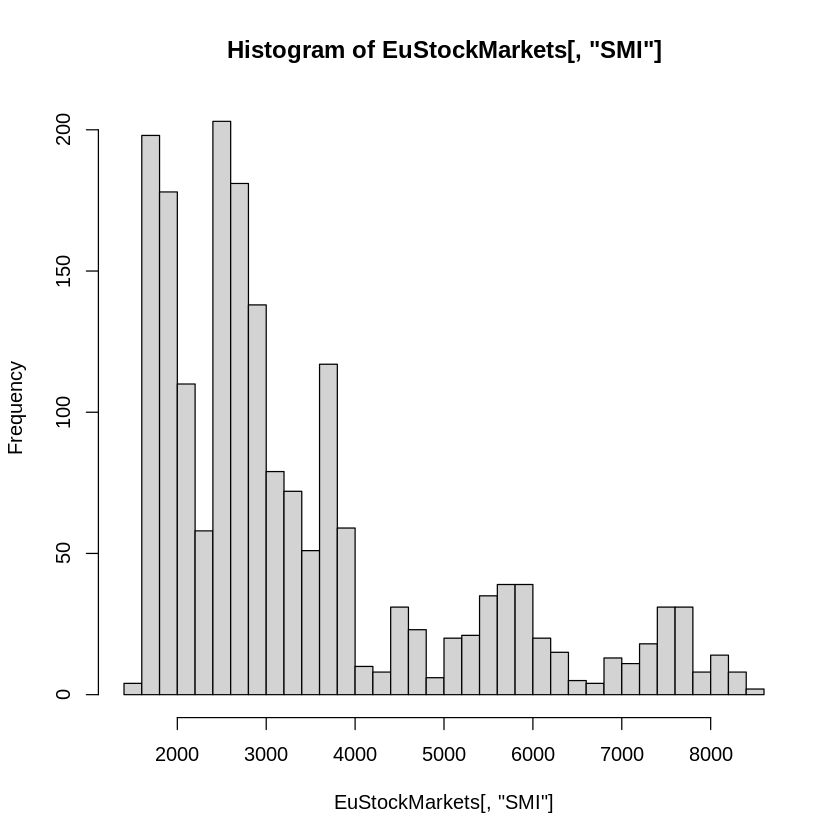

In [8]:
hist(EuStockMarkets [, "SMI"], 30)

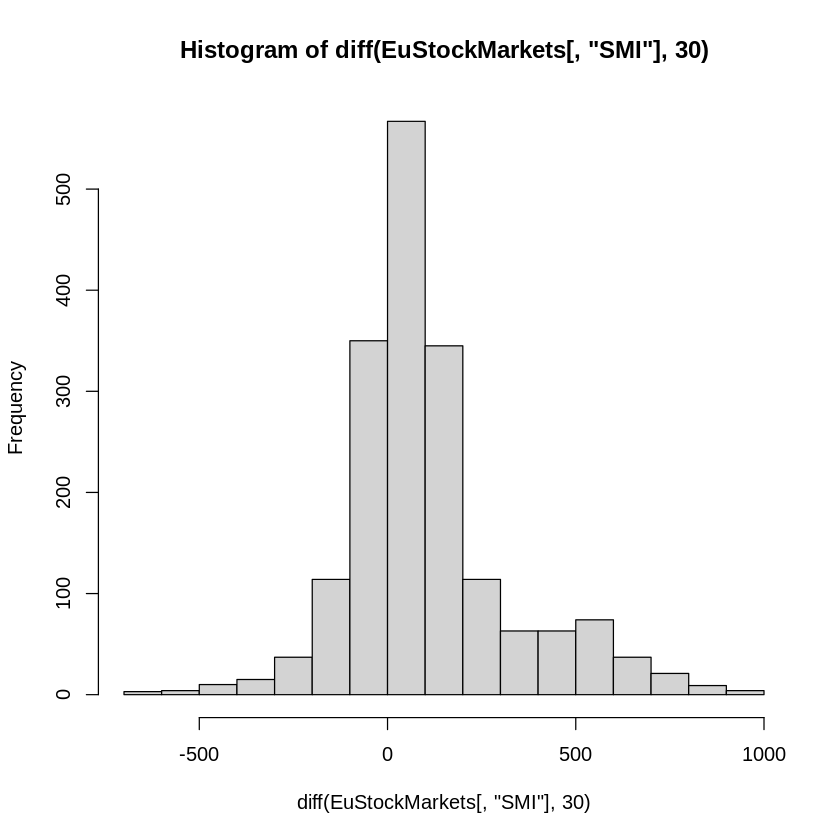

In [9]:
hist(diff(EuStockMarkets [, "SMI"], 30))

*Рис. 2.2. Необработанные данные (вверху) характеризуются большим разбросом значений и не подчиняются нормальному распределению. Этого следует ожидать, учитывая наличие тренда в исходных данных. Для его удаления и приведения данных к нормальному распределению нужно работать с разностями значений (внизу)*

В анализе временных рядов функция hist(), применимая к разностям значений, представляет намного больший интерес, чем она же, заданная для необработанных данных. В конце концов, при изучении временных рядов (особенно финансовых) намного чаще требуется отслеживать изменения исследуемой величины, а не ее абсолютное значение. В наибольшей степени это касается визуализации данных, поскольку гистограмма данных, имеющих выраженный тренд, не несет большой информативной нагрузки.

Обратите внимание на гистограмму данных разностного временного ряда. Если исходные графики котировок акций, приведенные в предыдущем разделе, более чем наглядно демонстрируют уверенный рост цен, то гистограмма разностей исходных данных представляет финансовую картину в таком виде, в каком она анализируется биржевыми игроками. Гистограмма разности указывает на то, что значения ряда данных со временем увеличиваются (положительные значения разности) и уменьшаются (отрицательные значения разности) примерно на одну и ту же величину.

Значения фондовых индексов не показывают временной рост и спад на одну и ту же величину, поскольку имеют тенденцию к постоянному увеличению. Однако из гистограммы разностей видно, что причиной такой тенденции является лишь небольшое смещение в пользу положительных, а не отрицательных различий.

Приведенный выше пример как нельзя лучше указывает на важность выбора правильной временной шкалы при выборке, обработке и анализе данных. Понимание того, демонстрируют акции высокую прибыль (долгосрочный график) или слабый рост (гистограмма разностей), напрямую зависит от типа временной шкалы — ориентируемся мы на сиюминутную выгоду или инвестируем в более долгосрочной перспективе. Если вы работаете в финансовой организации, занимающейся биржевой торговлей, то для изучения годовой прибыли лучше анализировать краткосрочные изменения, обращая особое внимание на моменты времени, когда разница цен на акции представляется отрицательными значениями. Являясь корпоративным инвестором — представляя крупное производственное предприятие или медицинское учреждение, — анализируйте ситуацию в долгосрочной перспективе, ориентируясь на рост доходности. Последний сценарий предполагает свои трудности: как выбрать временной отрезок, достаточный для максимизации прибыли, но не настолько большой, чтобы не дождаться ее получения? Описанные выше вопросы стимулируют финансовую индустрию к всестороннему исследованию временных рядов и прогнозированию будущих данных.

*Диаграммы рассеяния*

Традиционный подход к изучению диаграмм рассеяния настолько же полезен при изучении данных временных рядов, как и других типов данных. Мы можем использовать диаграммы рассеяния для определения взаимосвязи между ценами двух акций в отдельные моменты времени, а также отслеживания их временных изменений.

В следующем примере рассматриваются оба варианта.

* Цена двух разных акций с течением времени
* Разница (ежедневное изменение) цен двух акций с течением времени, вычисленная с помощью функции diff()

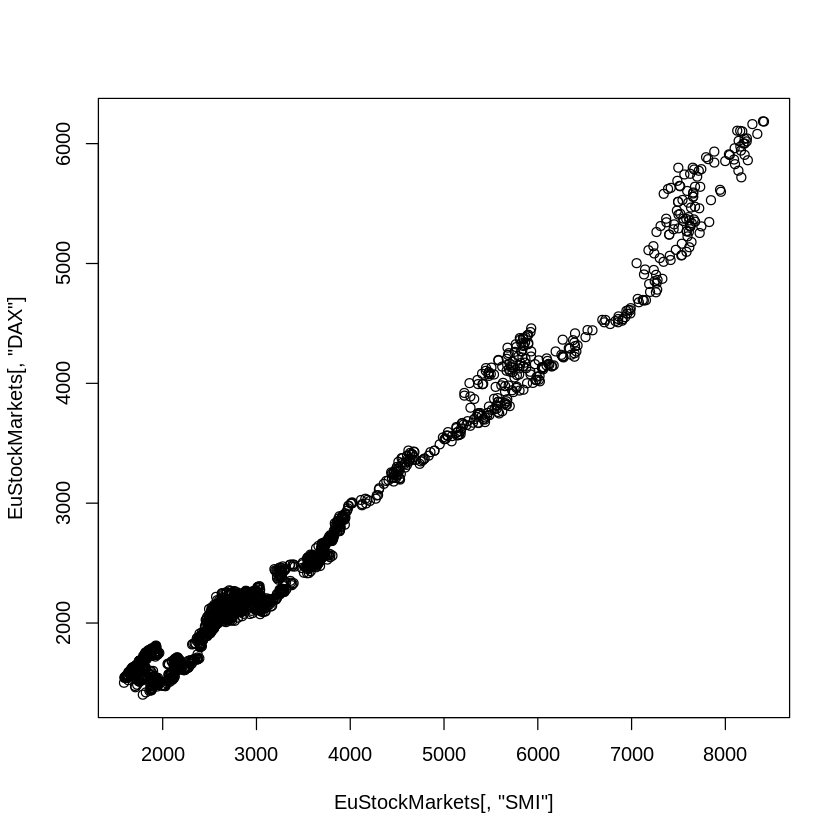

In [10]:
plot( EuStockMarkets [, "SMI"], EuStockMarkets [, "DAX"])

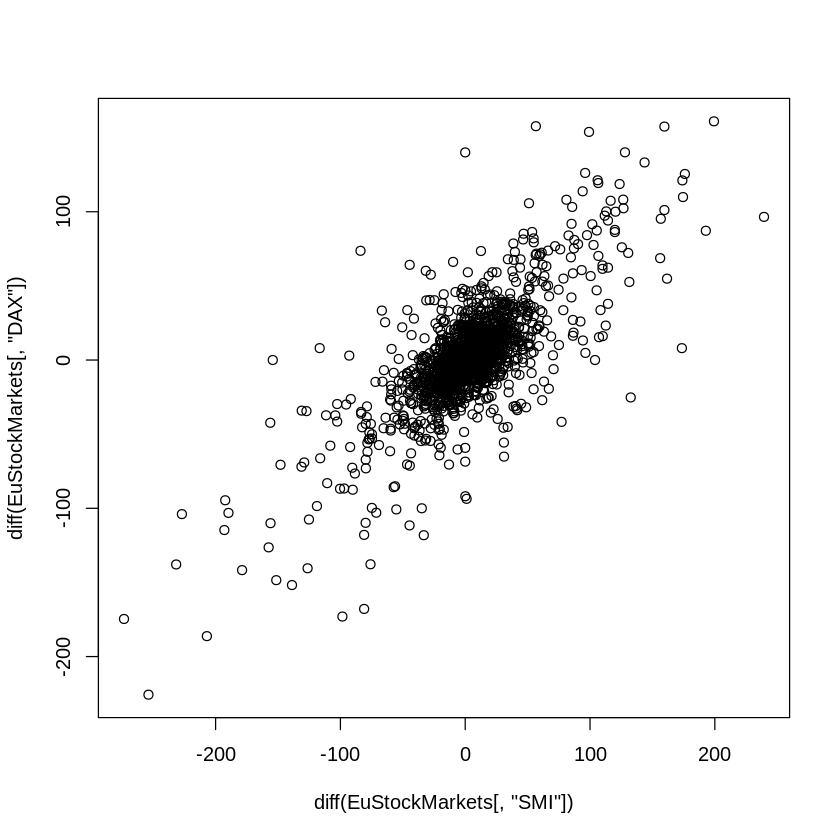

In [11]:
plot (diff (EuStockMarkets [, "SMI"]), diff (EuStockMarkets [, "DAX"]))

*Рис. 2.3. Простые диаграммы рассеяния двух сильно коррелирующих фондовых индексов. У нас есть веские причины с недоверием относиться к представленным на них данным.*




Как было показано выше, абсолютные значения менее информативны, чем разница значений соседних временных точек. Это побуждает к построению второй диаграммы рассеяния разностей исходных данных. Она указывает на сильную корреляцию данных, но последняя не настолько велика, как кажется. (Чтобы понять, почему, внимательно изучите раздел “Ложные корреляции” далее.)

Выраженные корреляции на рис. 2.3 представляют исключительно информационный интерес: даже если они являются истинными (есть основания сомневаться в этом), мы не сможем монетизировать полученную информацию на биржевых торгах. К тому времени, когда станет известно о росте или падении цены одной из акций, цена коррелирующей с ней акции успеет показать уверенный рост или падение, поскольку корреляция между ценами акций рассматривается в одни и те же моменты времени. Нам же нужно попытаться выяснить, можно ли по текущему изменению цены одной из акций предсказать будущее изменение цены другой акции. Чтобы понять это, перед анализом диаграммы рассеяния нужно сместить один из рядов разностей цен акций на шаг назад. Внимательно изучите следующий код; обратите внимание на построение диаграммы временных рядов разностей исходных данных, один из которых смещен относительно второго на единичный временной шаг (рис. 2.4).

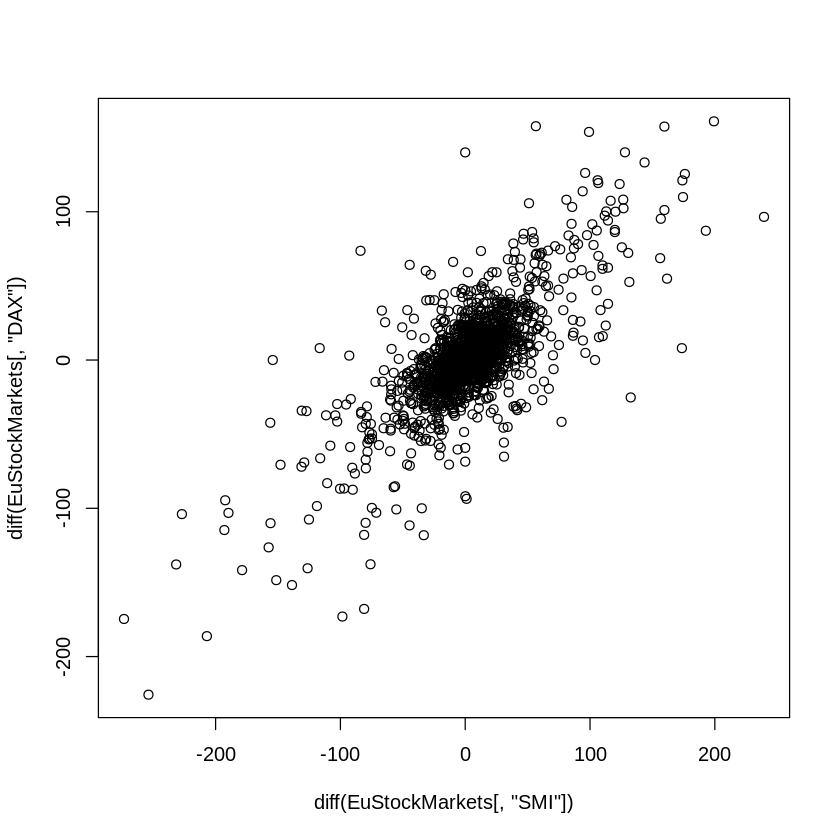

In [12]:
plot (diff (EuStockMarkets [, "SMI"]), diff (EuStockMarkets [, "DAX"]))

*Рис. 2.4. Корреляция между фондовыми индексами перестала проявляться после временного смещения одного из рядов. Это свидетельствует о невозможности предсказания индекса DAX по индексу SMI*

Приведенный выше код легко читается благодаря правильному выравниванию строк. Писать длинные строки нечитаемого кода, особенно на функциональном языке программирования, таком как R или Python, достаточно просто, но вам следует избегать их везде, где только возможно!

Полученный результат позволяет сделать нескольких важных выводов.
* Данные временных рядов можно анализировать с помощью общих исследовательских методов, но в таком анализе мало толку. Нам нужно модифицировать общие методы под измененный формат данных.
* Часто именно взаимосвязь между данными в разных точках или временное их изменение лучше всего описывает поведение данных.
* График на рис. 2.4 показывает, с какими трудностями приходится сталкиваться биржевым трейдерам. Если вы пассивный инвестор, склонный к выжиданию, то постараетесь извлечь выгоду из долгосрочного возрастающего тренда. Однако, попытавшись построить точный прогноз будущих изменений, вы столкнетесь с серьезными затруднениями!

Функция lag() языка R не позволяет смещать данные в произвольном направлении. С ее помощью данные сдвигаются только вперед во времени. Об этом нужно помнить, рассматривая сценарии, в которых направление смещения играет важную роль, — в разных задачах более предпочтительными могут быть сдвиги во времени как вперед, так и назад.


2.2 Специальные методы исследования временных рядов

Несколько описанных далее методов анализа данных основаны на изучении взаимосвязи значений временного ряда в разных временных точках. Если вам не доводилось встречаться с ними раньше, то вы, скорее всего, не работали с временными рядами. В оставшейся части  мы рассмотрим несколько принципов и связанных с ними методов классификации временных рядов.


В последующем материале активно используются следующие понятия.

*Стационарность*

Что означает для временного ряда быть стационарным и как проверяется стационарность временного ряда.

*Автокорреляция*

Что такое корреляция временного ряда с самим собой и как можно ее использовать для описания динамических изменений временного ряда.

*Ложная корреляция*

Что такое ложная корреляция и когда она возникает. Нам предстоит изучить следующие инструменты.
* Функции скользящего и расширяющегося окон
* Функции автокорреляции
  * Функция общей автокорреляции
  * Функция частичной автокорреляции


Сначала мы рассмотрим понятия стационарности, а затем перейдем к изучению связанных с ней методов анализа временных рядов — автокорреляции и ложной корреляции. Но перед тем как перейти к их изучению, давайте обсудим область применения этих методов.

Первый вопрос, на который нужно ответить при изучении временного ряда, заключается в том, какую систему он описывает: стабильную или изменчивую.

Уровень стабильности, или стационарности, важен для оценки того, как долгосрочное поведение системы в прошлом отражает ее будущее долгосрочное поведение.

После оценки уровня “стабильности” (здесь этот термин не имеет строго технического определения) временного ряда мы пытаемся определить, присуще ли ему динамическое поведение (например, сезонные изменения). Иначе говоря, мы ищем автокорреляции — в отдаленных и последних значениях, — по которым можно предсказать будущие данные. Наконец, получив представление о динамическом поведении системы, необходимо убедиться в том, что оно не основано на причинно-следственных связях, т.е. попробовать найти ложные корреляции.

*Определение стационарности*

Многие традиционные статистические модели анализа временных рядов основаны на предположении о том, что временные ряды являются стационарными.

Вообще говоря, стационарный временной ряд — это ряд, который характеризуется неизменными во времени статистическими показателями, в частности средним значением и дисперсией. Такое определение кажется относительно простым.

Тем не менее стационарность может быть сложной концепцией, особенно применительно к рядам реального масштаба времени. Но полагаясь на одну только интуицию, слишком просто обмануть себя. Поэтому мы сначала рассмотрим понятие стационарности интуитивно и формально, а затем перейдем к обсуждению строгих методов проверки системы на стационарность и способов практического ее применения.

*Интуитивный подход*

Стационарный временной ряд — это ряд, описывающий систему в устойчивом состоянии. Иногда трудно сказать, что именно это означает, и намного легче показать, что данные не являются стационарными, чем доказать их стационарность.

Простым примером нестационарных данных является набор сведений о пассажирах, перевозимых авиакомпанией, который рассматривался нами ранее и графически показан на рис. 2.5 (широко доступен для загрузки со многих интернет-ресурсов и представлен пакетом AirPassengers в языке R).

![](https://drive.google.com/uc?export=view&id=1Y-atna2BDaVoGY5aousykBLugQ1A8-ft)

*Рис. 2.5. Данные о пассажирских авиаперевозках являются примером нестационарного временного ряда. Со временем и среднее значение, и дисперсия изменяются. Кроме того, в данных проявляется сезонность, которая присуща только нестационарным процессам*

На нестационарность процесса указывает сразу несколько признаков. Во-первых, среднее значение ряда увеличивается со временем, а не остается постоянным. Во-вторых, расстояние между пиком и впадиной ежегодно увеличивается, что указывает на возрастание дисперсии процесса с течением времени. В-третьих, процесс демонстрирует сильное сезонное поведение, не характерное для стационарных данных.


*Определение стационарности и расширенный тест Дики-Фуллера*


Простое определение стационарного процесса заключается в следующем: процесс считается стационарным, если для всех возможных смещений *к* распределение $y_t, y_{t+1}, …,  y_{t+k}$ не зависит от *t*.

Статистические тесты на стационарность часто сводятся к вопросу о существовании единичного корня: является ли число 1 решением характеристического уравнения процесса. В общем случае линейный временной ряд является нестационарным, если у него существует единичный корень, хотя отсутствие единичного корня не указывает на стационарность. Ответ на вопрос о стационарности данных все еще остается сложной задачей, а определение того, имеет ли процесс единичный корень, остается актуальной областью исследований.

Тем не менее простое интуитивное представление о том, что такое единичный корень, можно получить из примера, описывающего процесс случайного блуждания:
$$y_t=f·t_{t-1}+e_t$$


В этом процессе значение временного ряда в текущий момент времени является функцией его значения в предшествующий момент времени и некоторой случайной ошибки. Если *f* равно 1, то ряд имеет единичный корень, “убегает” и не будет стационарным. Заметьте, нестационарность ряда не указывает на наличие в нем тренда. Случайное блуждание является хорошим примером нестационарного временного ряда, который не имеет основного тренда.

Определение стационарности процесса выполняется согласно специальным критериям проверки гипотез. Наиболее часто используемым критерием оценки стационарности временных рядов является расширенный тест Дики-Фуллера (Augmented Dickey-Fuller — ADF). В этом тесте в качестве основной гипотезы принимается предположение о существовании единичного корня. В зависимости от результатов тестирования нулевая гипотеза может быть отклонена при определенном уровне значимости. Это означает, что при данном уровне значимости наличие единичного корня не выступает подтверждением гипотезы.

1. Не волнуйтесь, если на данный момент вам не понятна эта концепция. При необходимости вы можете детально познакомиться с ней в публикациях, указанных в конце раздела.
2. Может показаться, что у временного ряда, описывающего процесс случайного блуждания, есть тренд, но это очень спорное утверждение, особенно для временных рядов, представляющих биржевые котировки.

Заметьте, что тесты на стационарность основаны на понимании того, изменяется ли среднее значение ряда. При этом дисперсия вычисляется с помощью преобразований, а не формальных методик. Таким образом, проверка стационарности сводится к оценке интегрированности временного ряда. Интегрированный ряд порядка *d* — это ряд, разности порядка *d* которого образуют стационарный временной ряд.

Формула теста Дики-Фуллера выглядит следующим образом:

$$Dy_t=y_t - y_{t-1} = (f-1)·y_{t-1} + e_t$$

Тогда проверка *f* = 1 сводится к определению *t*-критерия гипотезы о равенстве нулю запаздывающего параметра *y<sub>t-1</sub>*. Тест ADF предполагает большее число временных смещений, а базовая модель учитывает динамику более высокого порядка, которую можно описать таким рядом разностей:

$$y_t - f_1·y_{t-1} - f_2·y_{t-2} ... = e_t$$

Как видите, для получения ряда разностей нужно выполнить более сложные вычисления, а ожидаемое распределение, используемое для проверки нулевой гипотезы, несколько отличается от применяемого в тесте Дики-Фуллера. Тест ADF является наиболее широко освещенным методом проверки на стационарность в литературе, посвященной анализу временных рядов.

К сожалению, упомянутые выше тесты не позволяют однозначно решить задачу стационарности по целому ряду причин.
* Эти тесты имеют крайне низкую мощность при различении корней, близких к единице, от единичных корней.
* При небольшом размере выборок довольно часто встречаются ложные срабатывания для единичных корней.
* В большинстве тестов не выполняются все виды проверок временного ряда на нестационарность. Например, в некоторых случаях особое внимание уделяется проверке постоянности среднего значения или дисперсии (но не обоих показателей). В некоторых тестах анализируются только распределения общего характера. Следовательно, перед использованием теста нужно познакомиться с его ограничениями и убедиться, что они соответствуют представлениям об анализируемых наборах данных.


*Альтернативная нулевая гипотеза: тест KPSS*

В то время как тест ADF проверяет нулевую гипотезу о единичном корне, тест Квятковского-Филипса-Шмидта-Шина (KPSS — Kwiatkowski-Philips-Schmidt-Shin) выдвигает нулевую гипотезу о стационарном процессе. В отличие от ADF, тест KPSS невозможно выполнить с помощью базовых инструментов языка R, хотя он все еще широко применяется на практике. Тесты различаются областью назначения и принципами использования — рассмотрение этих вопросов выходит за рамки нашего материала, но вы можете изучить их на специализированных сайтах.


*Практический подход*

Критерий стационарности находит широкое практическое применение.

Во-первых, стационарные процессы описываются большим количеством моделей, например традиционными моделями с заданной силой связи и классическими статистическими моделями. Подробно эти классы моделей описываются далее.

В более широком смысле точность модели нестационарного временного ряда будет меняться по мере изменения временных характеристик данных. Иными словами, в такой модели, призванной оценить среднее значение временного ряда с непостоянными средним и дисперсией, ошибки выборки и вычисления будут изменяться со временем, что делает значения модели недостоверными.

Часто временной ряд можно сделать в достаточной степени стационарным с помощью относительно простых преобразований. Наибольшую популярность приобрели логарифмическое преобразование и преобразование по закону квадратного корня, особенно в рядах с изменяемой во времени дисперсией. Точно так же для удаления из ряда тренда применяются разности. Иногда разности между членами ряда приходится вычислять более одного раза. Однако, если порядок разностей слишком большой (более трех), то маловероятно, что проблему стационарности все же удастся решить с их помощью.

*Логарифмирование или извлечение квадратного корня*

Хотя вычислять квадратный корень намного проще, чем логарифм, обратите внимание на оба варианта. Оцените диапазон данных и необходимость сжатия больших значений, не отвлекаясь на преждевременную оптимизацию (чрезмерную пессимизацию) вычислительного алгоритма и кода.

Стационарность — не единственное предположение, на котором строятся модели прогнозирования. Другим распространенным предположением является нормальность распределения входных переменных или прогнозируемой величины.

В таких моделях востребованными оказываются совсем другие преобразования, например преобразование Box Сох, которое реализовано в пакете forecast языка R и в пакете scipy.stats языка Python. Такие преобразование позволяет привести ассиметричные данные (с распределением, отличным от нормального) к нормальному распределению. Однако возможность преобразования данных не предполагает необходимость выполнения этой операции. Тщательно изучите расстояния между точками данных в исходном наборе данных и убедитесь, что в процессе преобразования не будет утеряна важная информация.

*Преобразования основываются на предположениях*

Может показаться, что предлагаемые преобразования не основаны на предположениях (функции log() и sqrt () кажутся предельно простыми), но так ли это в действительности?

Как уже отмечалось, логарифмическое преобразование и преобразование по закону квадратного корня обычно используются для уменьшения временной дисперсии ряда. И они основаны на определенных предположениях. Во-первых, данные ряда должны быть положительными. Во-вторых, если вы сдвинете данные до вычисления квадратного корня или логарифма, то увеличите ошибку выборки или же решите, что ею можно пренебречь. И в-третьих, извлекая квадратный корень или рассчитывая логарифм, вы делаете большие значения менее отличными друг от друга, эффективно “ужимая” расстояние между большими, но не меньшими значениями и уменьшая величину выбросов. Такое преобразование уместно далеко не во всех случаях.


2.3 Применение оконных функций

Рассмотрим наиболее важные графики временных рядов, которые нам придется исследовать в ходе первичного анализа наборов данных.

*Скользящее окно*

Общепринятой в анализе временных рядов является оконная функция. Она представляется функцией любого типа и применяется для агрегации данных с целью последующего сжатия (понижения частоты дискретизации) или сглаживания).

Наряду с рассмотренными ранее областями применения, операции сглаживания и агрегации по окнам позволяют добиться более информативной визуализации данных.

Для вычисления скользящего среднего и проведения некоторых других линейных вычислений над рядом точек данных применяется функция filter() стандартной библиотеки языка R.

При выполнении кода создается график, показанный на рис. 2.6.

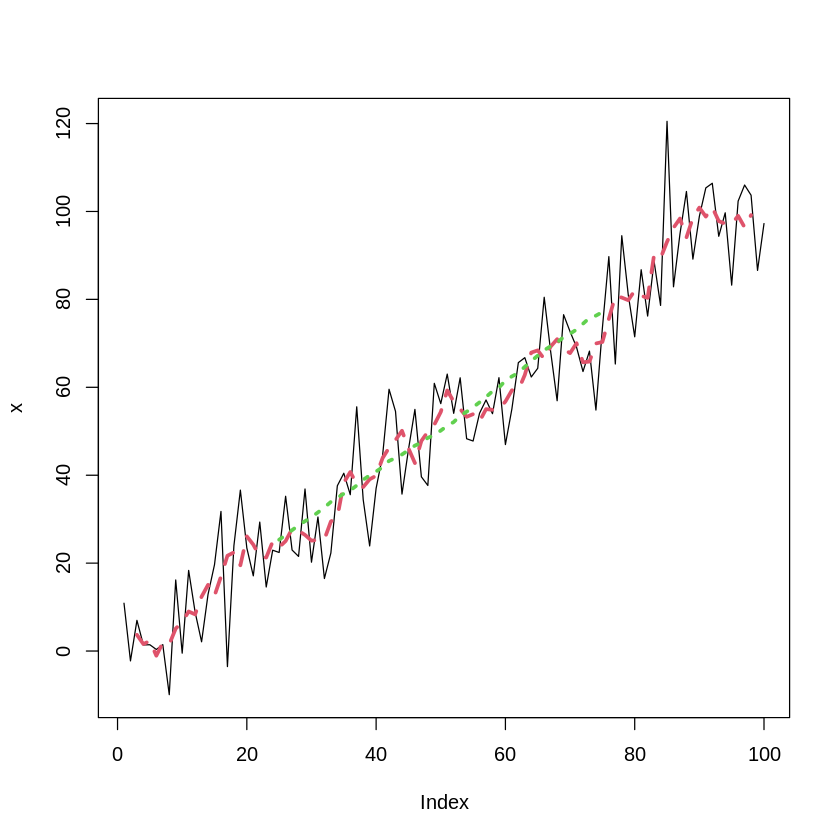

In [13]:
## Вычисление скользящего среднего с помощью функции filter()
x <- rnorm(n = 100, mean = 0, sd = 10) + 1:100
mn <- function(n) rep(1/n, n)
plot(x, type = 'l', lwd = 1)
lines (filter (x, mn ( 5) ), col = 2, lwd = 3, lty = 2)
lines (filter (x, mn(50)), col = 3, lwd = 3, lty = 3)

*Рис. 2.6. Две кривые, построенные в процессе сглаживания скользящего среднего. Их можно использовать для выявления тренда в сильно зашумленных данных или определения уровня отклонения от линейной зависимости, рассматриваемого как шум*

Если точки данных в окне нужно описать нелинейным образом, то придется отказаться от функции filter(), поскольку она основана исключительно на линейных способах преобразованиях данных. Рассмотрите функции пакета zoo, в частности функцию rollapply(), результат использования которой показан на рис. 2.7.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




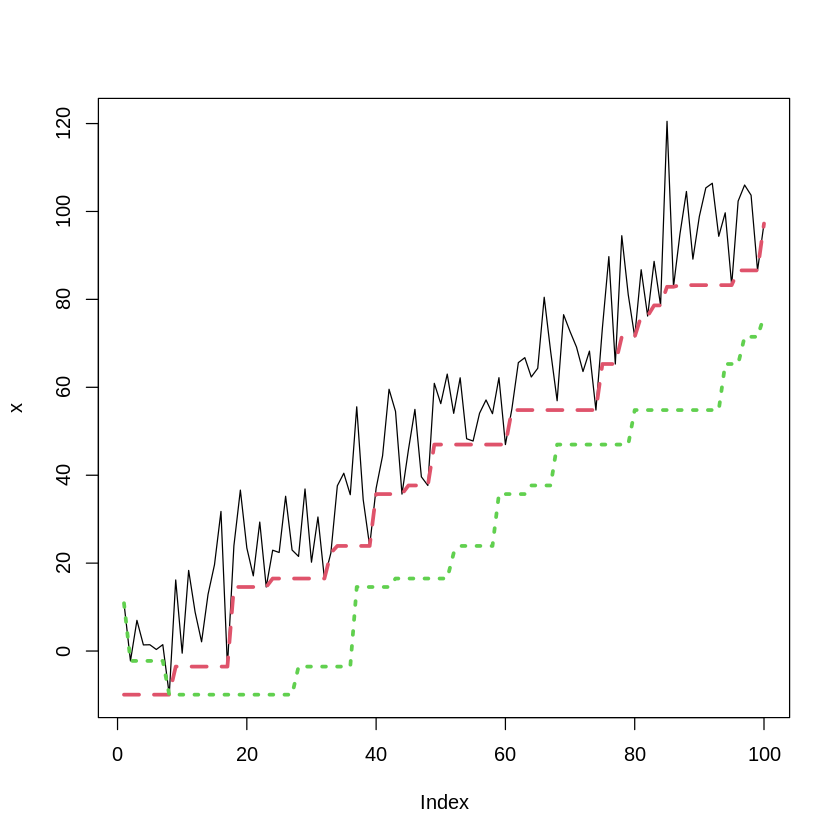

In [14]:
## Настраиваемые оконные функции
install.packages("zoo")
require (zoo)
f1 <- rollapply(zoo(x), 20, function(w) min(w), align = "left", partial = TRUE)
f2 <- rollapply (zoo(x), 20, function(w) min(w), align = "right", partial = TRUE)
plot (x, lwd = 1, type = 'l')
lines (f1, col = 2, lwd = 3, lty = 2)
lines (f2, col = 3, lwd = 3, lty = 3)

*Рис. 2.7. Минимум скользящего окна выровнен либо по левому краю (длинные штрихи), либо по правому (короткие штрихи). Выравнивание по левому краю позволяет учитывать события в будущем, тогда как выравнивание по правому — только в прошлом. Это важно понимать во избежание упреждения. Тем не менее иногда выравнивание по левому краю может быть даже полезным, позволяя применить знания о будущем для правильного анализа имеющихся данных. В отдельных случаях правильных результатов не позволяет добиться даже упрежденный просмотр данных. Если знание будущих значений не помогает в анализе временного ряда, то это означает, что рассматриваемая величина не информативна по своей сути и от ее исследования нужно отказаться*

В функциях пакета zoo следует использовать объекты пакета. При непосредственной передаче числовых векторов в функцию rollapply() аргумент align в ней не учитывается. Чтобы убедиться в этом, удалите оболочку zoo () у аргумента х в предыдущем коде. Вы получите идентичные кривые вследствие скрытой ошибки, которая чрезвычайно опасна при анализе временных рядов, поскольку может привести к непреднамеренному упреждению.

Приведенный пример наглядно показывает важность обязательной проверки чистоты кода в процессе анализа данных. К сожалению, скрытая ошибка не является чем-то необычным во многих популярных пакетах не только языка R, но и языках описания сценариев. Будьте предельно внимательны при их использовании! У вас есть возможность настраивать собственные оконные функции для эффективного ограничения исследуемых зависимостей. Начните с изучения и изменения кода уже существующих функций, включенных в такие популярные пакеты, как zoo. Это наиболее оправданный подход, поскольку даже в одномерном временном ряду существует большое количество факторов, требующих специального внимания — значения NA, а также начальные и конечные точки ряда, у которого меньше точек, чем требует размер окна.

*Инструменты языка R для работы с временными рядами*


Ранее здесь мы рассмотрели базовый класс ts языка R, применяемый для обработки временных рядов. В этом разделе мы воспользовались для этих целей объектами пакета zoo. Кроме того, в дальнейшем мы будем активно использовать пакет xts. Ниже приведены краткие замечания по использованию объектов пакетов zoo и xts, расширяющих возможности класса ts.
* Объект класса ts предназначен для работы с равномерно распределенными полными временными рядами — в нем отсутствуют данные временных индексов, но содержатся сведения о начальной и конечной точках, а также о частоте выборки временного ряда.
* Объекты класса ts поддерживают периодически повторяющиеся временные циклы, например годы или месяцы.
* В объектах пакета zoo временные метки хранятся в специальном атрибуте index, поэтому их можно применять для хранения неравномерно распределенных или непериодических временных рядов.
* На графиках объекты пакета zoo можно откладывать вдоль как горизонтальной, так и вертикальной осей.
* Данные объекта пакета zoo можно представить вектором или матрицей.
* Объекты пакета xts являются расширением объектов пакета zoo с большим количеством параметров.


*Расширяющиеся окна*

В анализе временных рядов расширяющиеся окна используются несколько реже скользящих окон, поскольку имеют ограниченную область применения.

Расширяющиеся окна уместно использовать только при подведении сводной статистики устойчивых процессов, которые не подвержены сильным временным изменениям и не демонстрируют заметных колебаний. Расширяющееся окно не имеет строго заданного постоянного размера. Имея в самом начале минимально возможный размер, с течением времени оно расширяется, включая все точки данных до указанного момента времени.

Расширяющееся окно обеспечивает большую достоверность оценки статистических показателей во времени за счет “расширения” диапазона исследуемых значений временного ряда. Заметьте, что такой подход имеет место только при справедливости гипотезы о стационарности исходной системы. Он позволяет получать и оценивать сводную статистику в режиме реального времени — по мере включения во временной ряд новых данных.

Внимательно изучив инструменты стандартной библиотеки языка R, вы найдете, что в ней уже реализованы функции управления расширяющимися окнами, такие как cummax() и cummin(). Более того, функцию cumsum () можно легко приспособить к вычислению накопительного среднего. На следующем графике вы можете познакомиться с расширяющимися окнами max и mean (рис. 2.8).

![](https://drive.google.com/uc?export=view&id=1WVXM_HUWoymjGikbhFxIwIPDJF7xiOGB)

*Рис. 2.8. Расширяющиеся окна max (длинные штрихи) и mean (короткие штрихи). В первом случае расширяющееся окно отражает глобальный максимум до текущего момента времени, представленный монотонной функцией. Благодаря “долгосрочной памяти” кривая расширяющегося окна mean расположена ниже графика скользящего среднего (см. рис. 2.7) — основной тренд в расширяющемся среднем выражен слабее. Хорошо это или плохо, зависит от исходных предположений о поведении исследуемой системы*


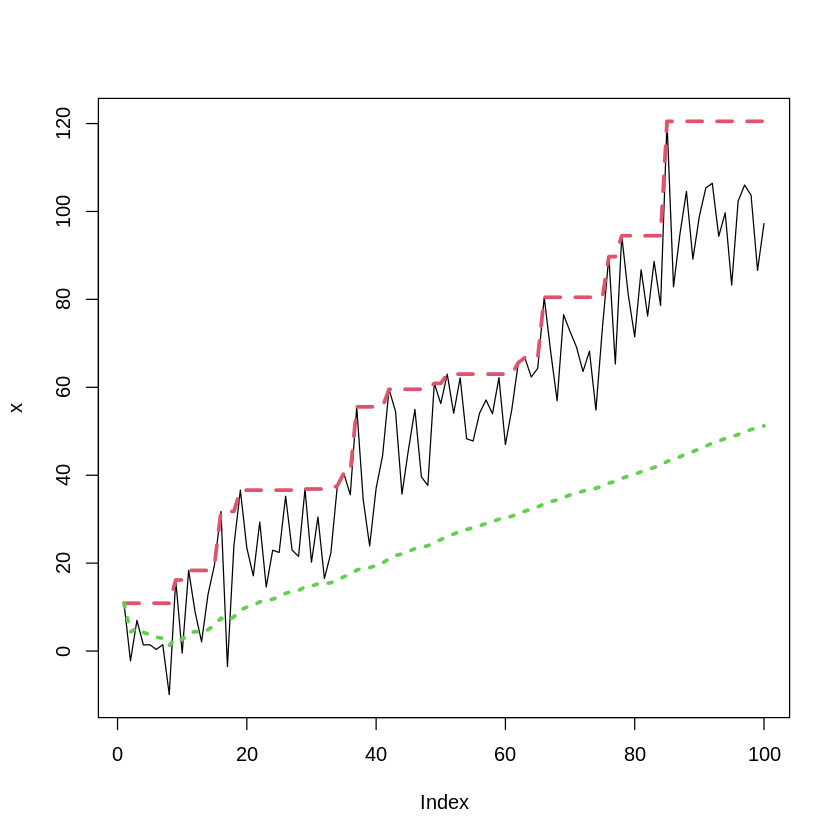

In [15]:
# Расширяющиеся окна
plot(x, type = 'l', lwd = 1)
lines(cummax(x), col = 2, lwd = 3, lty = 2)   # max
lines(cumsum(x)/1:length(x), col = 3, lwd = 3, lty = 3)  # mean

Для задания расширяющегося окна с произвольными настройками можно обратиться к функции rollapply(), используемой ранее при описании пользовательского скользящего окна. Отличие состоит в том, что в данном случае предстоит указать последовательность размеров окна, а не скаляр. При выполнении следующего кода создается график, идентичный показанному на рис. 2.8, но теперь полученный с помощью функции rollapply(), а не встроенных инструментов языка R.

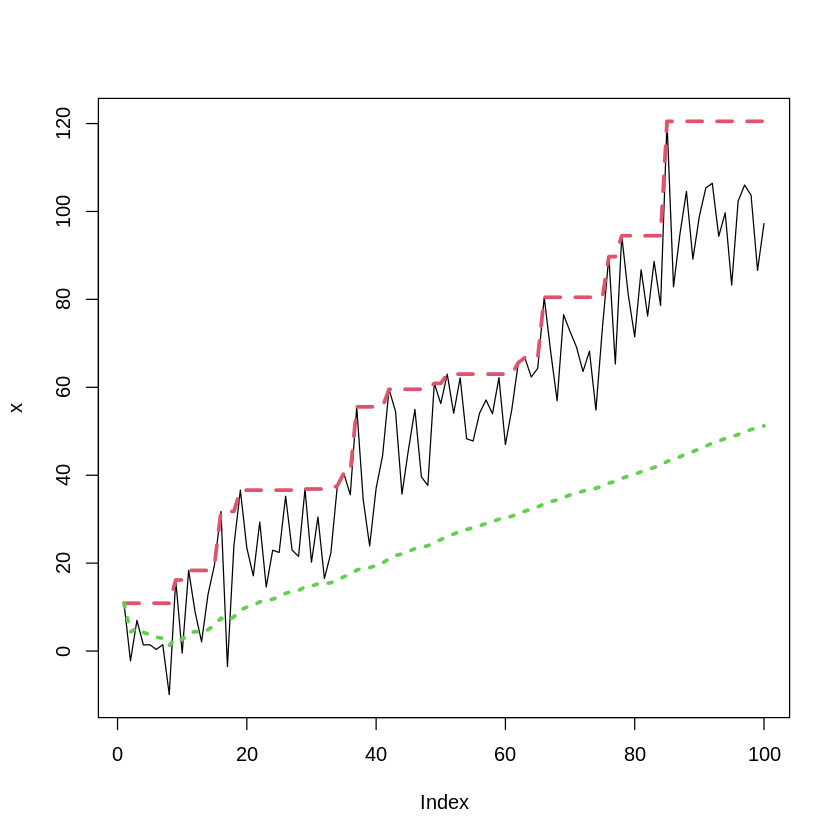

In [16]:
plot(x, type = 'l', lwd = 1)
lines(rollapply(zoo (x), seq_along(x) , function(w) max(w),
partial = TRUE, align = "right"), col = 2, lwd = 3, lty = 2)
lines (rollapply (zoo (x), seq_along(x), function(w) mean(w),
partial = TRUE, align = "right"), col = 3, lwd = 3, lty = 3)

*Пользовательские оконные функции*

Необходимость в применении пользовательских оконных функций возникает только в случаях, когда обойтись без них очень сложно или просто невозможно, например при исследовании временных рядов с известными поведенческими закономерностями или анализе данных с помощью строго заданных вычислительных методик.

Предположим, что требуется задать окно для исследования отдельного признака — наиболее информативного в исследуемой системе. Нам предстоит узнать, что именно описывают исследуемые данные: монотонное изменение (например, уровня сахара в крови) или беспорядочные скачки, подразумевающие инструментальный шум, а не тренд. Для исследования такого поведения данных лучше написать пользовательскую функцию и применить ее в сценариях со скользящим и/или расширяющимся окном.


2.4 Самокорреляция и ее поиск

В основе понятия самокорреляции временного ряда лежит представление о том, что значения временного ряда в отдельные моменты времени могут коррелировать с его значениями в другие моменты времени. Заметьте, что термин ‘‘самокорреляция” не имеет строго технического определения и применяется для описания общей идеи.

Прекрасным примером самокорреляции служит взаимосвязь между значениями временных рядов, представляющих годовые данные о дневной температуре воздуха. Допустим, что при сравнении температур воздуха 15 мая и 15 августа каждого года была выявлена следующая взаимосвязь между данными: более жаркая погода 15 мая имеет тенденцию к корреляции с более жаркой (или с более холодной) погодой 15 августа. Если такая взаимосвязь действительно существует, то выявленный факт, указывающий на определенную закономерность в поведении температуры, можно использовать при составлении долгосрочных прогнозов погоды. С другой стороны, факт отсутствия корреляции (нулевая корреляция) также позволяет сделать определенные выводы: сведения о температуре 15 мая не позволяют выдвигать какие бы то ни было предположения о диапазоне температур 15 августа.

От описанного выше простого примера мы перейдем к изучению автокорреляции — общему случаю самокорреляции, лишенному привязки к конкретному моменту времени. В частности, автокорреляция сводится к решению задачи поиска взаимосвязи между любыми двумя точками общего временного ряда, расположенными на строго заданном расстоянии друг от друга. Далее мы остановимся на рассмотрении этого вопроса более подробно, а затем перейдем к изучению понятия частичной автокорреляции.

**Полезное:**

**R:** https://ranalytics.github.io/tsa-with-r/intro.html

**Python:** https://machinelearningmastery.ru/time-series-forecasting-methods-in-python-cheat-sheet/

**Анализ временных рядов с помощью python:**
https://habr.com/ru/post/207160/

**Модель Python | ARIMA для прогнозирования временных рядов**
https://translated.turbopages.org/proxy_u/en-ru.ru.4d8dc73e-6355099d-ad15833a-74722d776562/https/www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/

**Открытый курс машинного обучения. Тема 9. Анализ временных рядов с помощью Python**
https://habr.com/ru/company/ods/blog/327242/

**Для самостоятельного изучения:
Бокс Дженкинс - Анализ временных рядов, прогноз и управление т.1 стр 39-101**
https://www.mbureau.ru/articles/dissertaciya-o-prognozirovanii-vremennyh-ryadov-spisok-literatury

*Автокорреляционная функция*

Изучение автокорреляции начнем с ее определения в Википедии.

Автокорреляция, также известная как корреляция рядов, — это корреляция сигнала с его смещенной во времени копией как функция смещения. В нестрогом понимании автокорреляция описывает сходство между наблюдениями как функцию временного сдвига между ними.

А теперь перепишем это определение простым языком. Автокорреляция дает представление о линейной взаимосвязи точек данных, полученных в разные моменты времени, как о функции разницы времени их получения.

Проще всего функция автокорреляции (AutoCorrelation Function — ACF) воспринимается в графическом виде. Для построения графика функции автокорреляции можно обратиться к базовым инструментам языка R.

In [17]:
##R использует радианы

In [18]:
x = 1:100

In [19]:
## Noiseless series

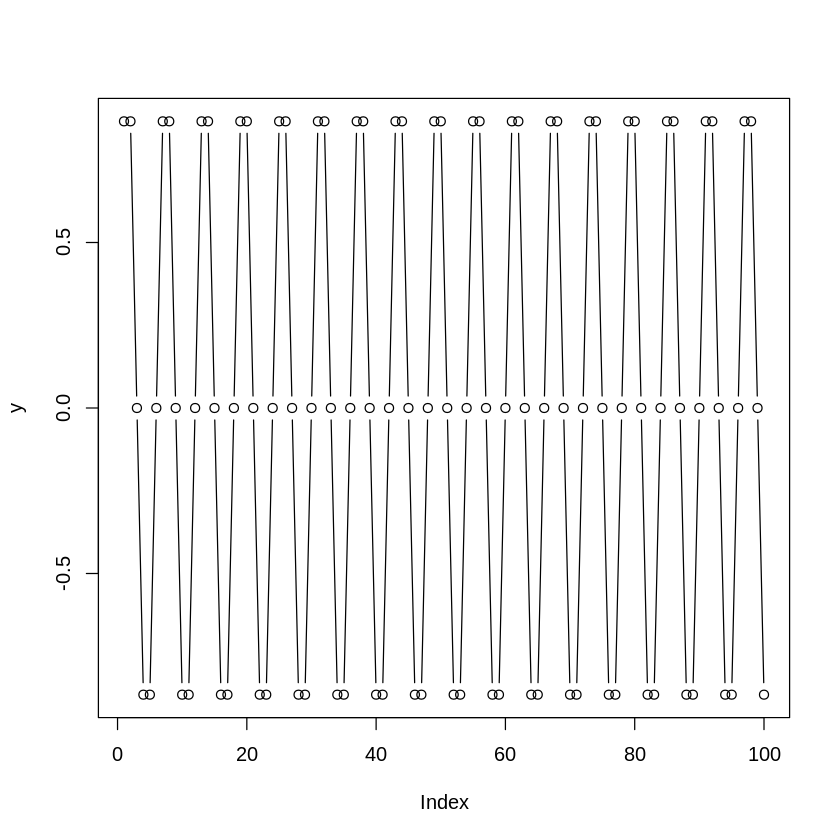

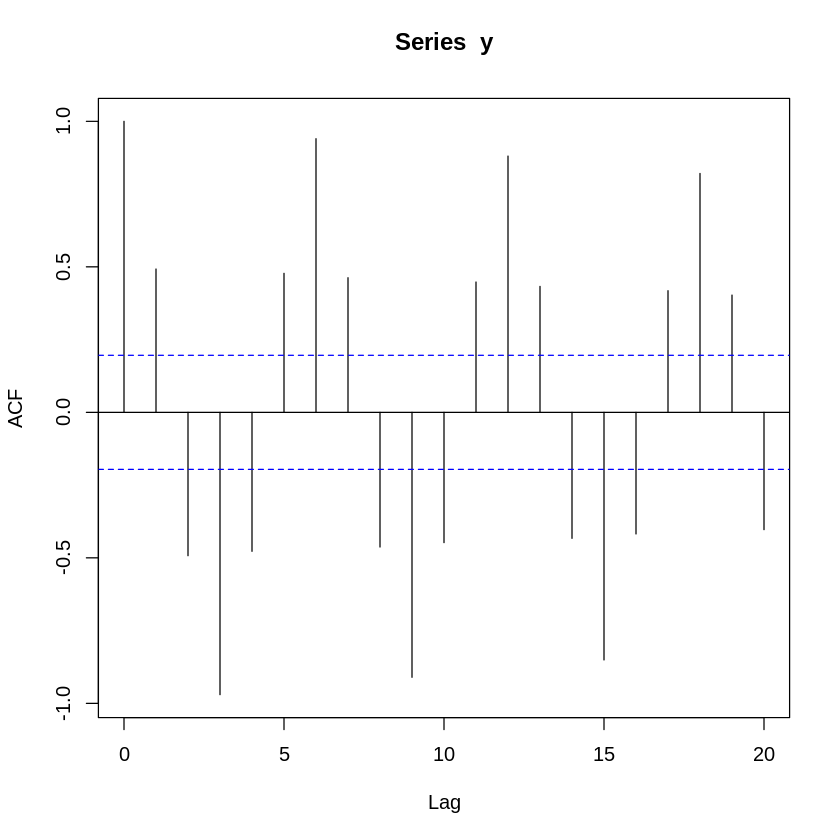

In [20]:
y = sin(x * pi / 3)
plot(y, type = 'b')
acf(y)

*Корреляция в детерминированной системе*

Ряд значений функции синуса описывает полностью детерминированную систему с известной последовательностью входных данных. Тем не менее корреляция в ней не равна единице. Почему? Изучите этот ряд и попробуйте самостоятельно разобраться в том, как вычисляется функция АСЕ Понимание того, увеличивается или уменьшается последующее значение, зависит от места в цикле, с которого начинается анализ данных. Для определения направления изменения значений достаточно отследить несколько точек подряд (функция ACF является однозначной мерой корреляции). Если же это не представляется возможным, то корреляция будет меньше единицы, так как для большинства точек данных последующие значения представлены не одним, а несколькими значениями. Важно понимать, что корреляция, отличная от единицы, не указывает на зашумленность или случайность поведения временного ряда.

Автокорреляционная функция показывает, что точки с нулевым временным сдвигом имеют единичную корреляцию (верно для любого временного ряда), тогда как корреляция точек данных с единичным сдвигом составляет 0,5. При этом точки, разделенные двойным временным сдвигом, характеризуются корреляцией, равной -0,5, и т.д.

Вычислить функцию ACF несложно. Попробуем сделать это самостоятельно, обратившись к функции shift () пакета data.table.

In [21]:
library("data.table")


Attaching package: ‘data.table’


The following objects are masked from ‘package:zoo’:

    yearmon, yearqtr




In [22]:
cor(y, shift(y, 1), use = "pairwise.complete.obs")

[1] 0.5001531

In [23]:
cor(y, shift(y, 2), use = "pairwise.complete.obs")

[1] -0.5037152

Проведенные выше расчеты соответствуют результатам, проиллюстрированным на рисунке Хотя написание собственного кода вычисления функции ACF не вызывает особых затруднений, все же лучше использовать для этих целей проверенное решение, наприме,р представленное функцией acf() языка R. Используя ее, вы получаете в свое распоряжение следующие возможности:
* Автоматическое построение графиков с важными подписями.
* Правильное определение (в большинстве случаев, но не всегда) максимального количества сдвигов, для которых рассчитываются автокорреляционная функция, а также возможность их переопределения вручную.
* Изящный способ обработки многомерных временных рядов.
Остановимся на важных математических особенностях функции АСЕ
* Автокорреляция периодической функции имеет ту же периодичность, что и исходный процесс. Вы можете увидеть это на приведенных выше графиках для функции синуса.
* Автокорреляция суммы периодических функций — это сумма автокорреляций для каждой функции в отдельности. Вы можете легко проиллюстрировать это утверждение на примере, реализуемом с помощью простого кода.
* Все временные ряды имеют единичную автокорреляцию для нулевого временного сдвига.
* Автокорреляция белого шума будет приблизительно равняться 0 при любых временных сдвигах, за исключением нулевого.
* Автокорреляция симметрична относительно отрицательных и положительных временных сдвигов, поэтому рассчитывать ее в явном виде имеет смысл только в одном из вариантов (для положительных сдвигов). Чтобы доказать это, постройте автокорреляционную функцию, рассчитанную указанным способом вручную.
* Статистическое правило определения значимой ненулевой оценки автокорреляции основано на выборе критической области с границами ±1,96n. В этом правиле в расчет принимаются достаточно большой размер выборки и конечное значение дисперсии процесса.

**Частная автокорреляция**

Функция частной автокорреляции (Partial Autocorrelation Function — PACF) немного сложнее автокорреляционной функции. Частная автокорреляция временного ряда для заданного сдвига — это корреляция временного ряда с самим собой в этом смещении с учетом всей доступной информации между указанными двумя моментами времени.

С благоразумностью звучания определения нельзя не согласиться. Но что же означает фраза “учет всей доступной информации между указанными двумя моментами времени”? А означает она то, что для получения точного результата нужно вычислить ряд условных корреляций и вычесть их из общей корреляции.

Вычисление функции PACF — это нетривиальная задача, и для ее решения придумано большое количество методик. Мы не будем обсуждать, но вы можете найти их описание в документации к соответствующим инструментам языков R и Python (теория и формулы книга Бокс и Дженкинс – книга на флэшке).

Как и ACF, функцию PACF легче изучать графически, чем концептуально. Ее важность в анализе данных также становится более очевидной при визуализации в отдельной области построения.

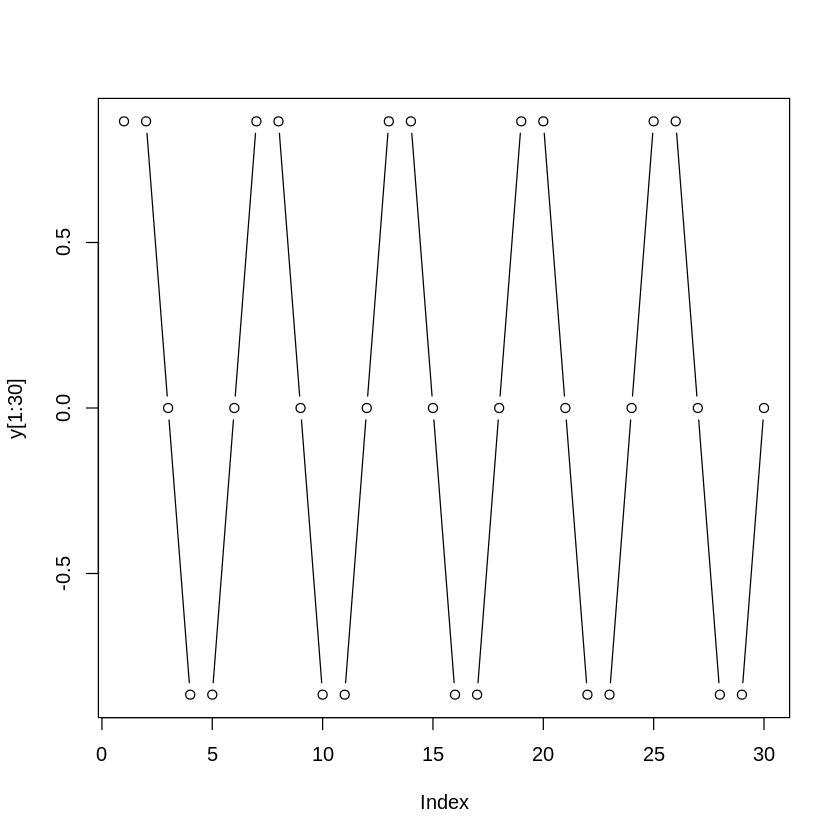

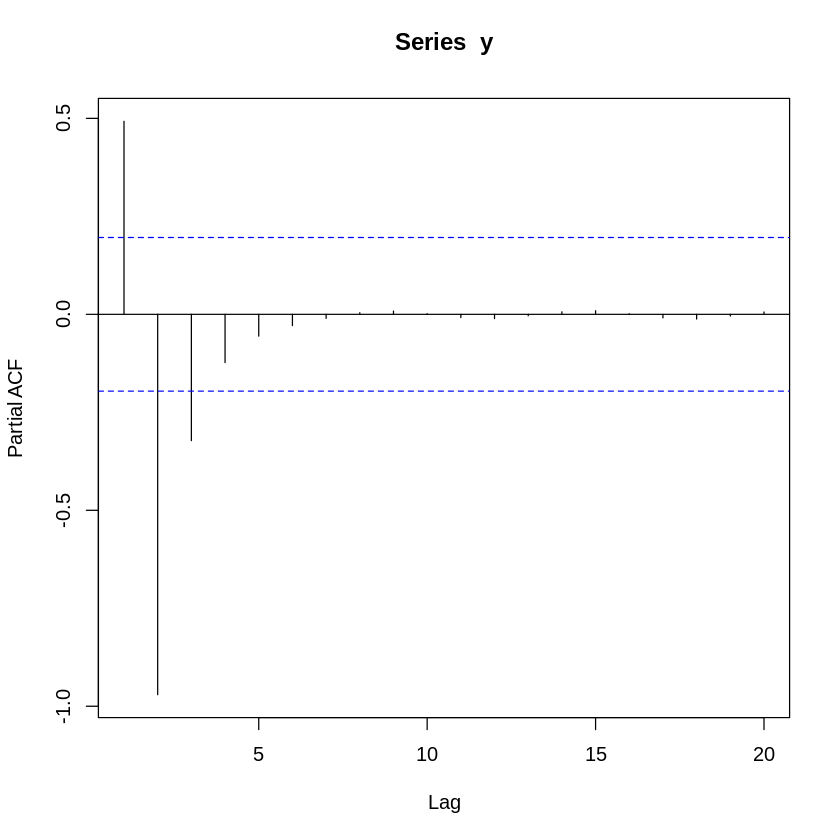

In [24]:
у = sin(x * pi /3)
plot (у [1:30], type = 'b')
pacf(y)

Функция PACF для временного ряда функции синуса сильно контрастирует с функцией АСЕ Функция PACF наглядно показывает, какие точки данных являются информативными, а какие выступают гармониками более коротких периодов времени. Для периодического процесса без шума, например, описываемого функцией синуса с периодом Т, то же самое значение ACF будет наблюдаться в периоды времени Т, 2Т, ЗТ и так далее вплоть до бесконечности. Функция ACF не в состоянии отсеять такие избыточные корреляции. С другой стороны, функция PACF показывает, какие корреляции для заданных сдвигов являются истинными, а какие — избыточными. Эти сведения оказываются неоценимыми при выборе длинного окна для достаточно большого количества данных в требуемом временном масштабе.

Критическая область для функции PACF рассчитывается так же, как и для функции АСЕ Она имеет границы ±1,96n. Все временные сдвиги, значения PACF для которых попадают в обозначенную такими границами область, фактически равны нулю.

До настоящего момента нами рассматривались примеры только полностью бесшумных одночастотных процессов. Давайте изучим более сложный пример. Представим сигнал суммой двух синусоидальных функций в условиях нулевого, слабого и сильного шума. Для начала построим графики синусоид, лишенных шума, по отдельности.

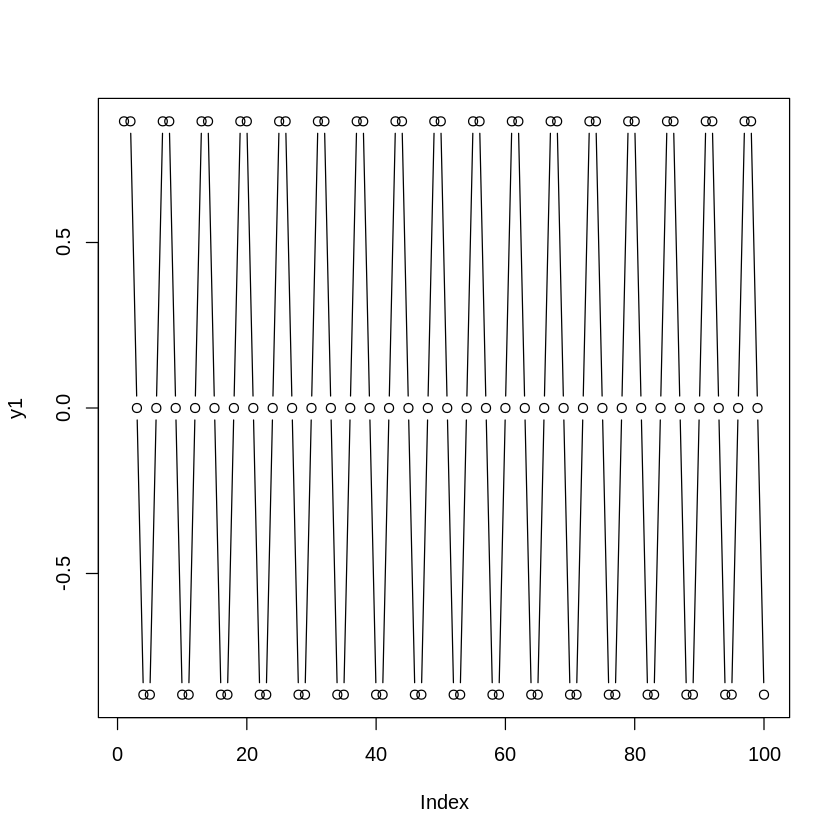

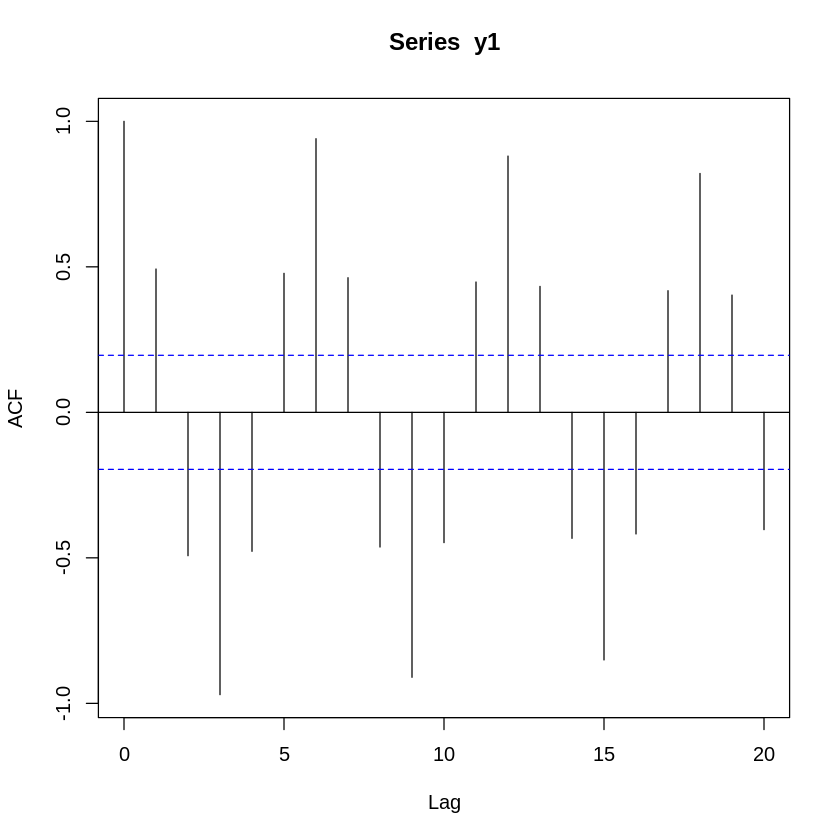

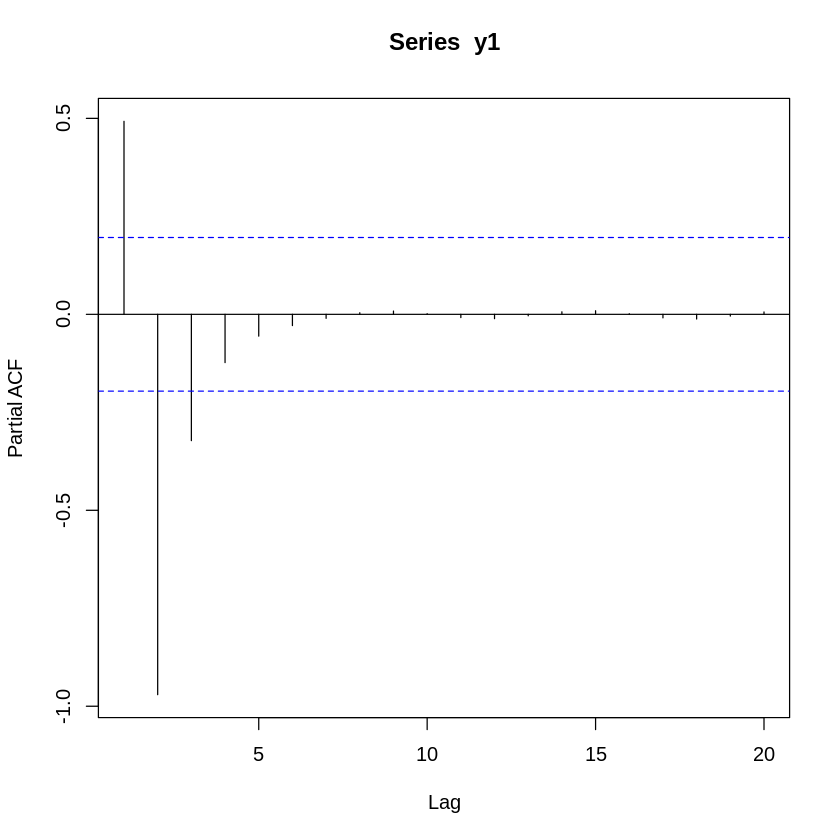

In [25]:
y1 = sin(x * pi / 3)
plot(y1, type = 'b')
acf(y1)
pacf(y1)


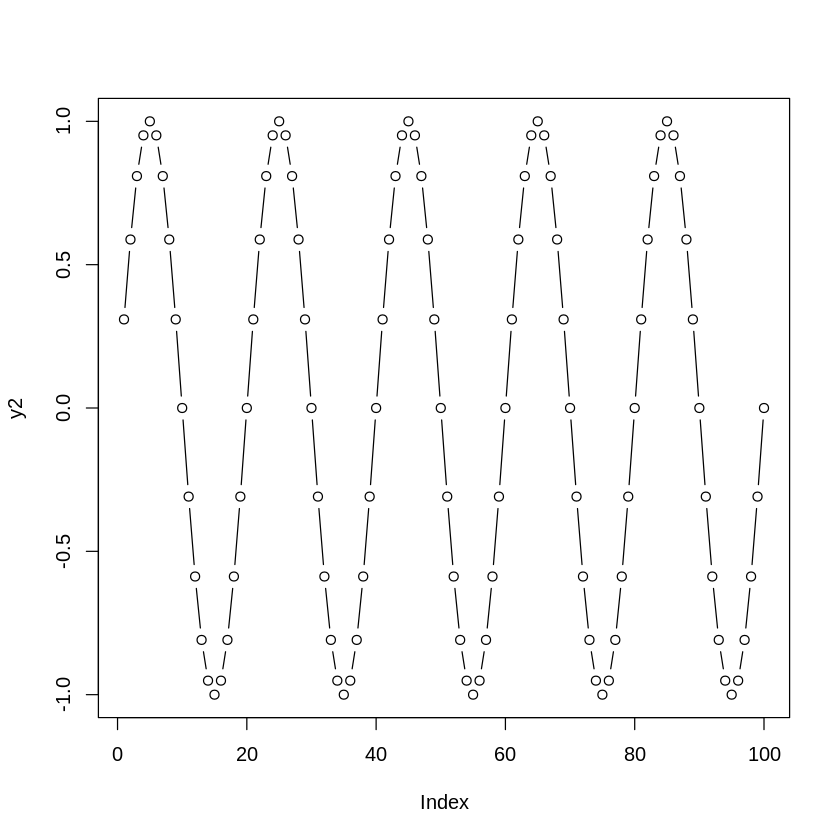

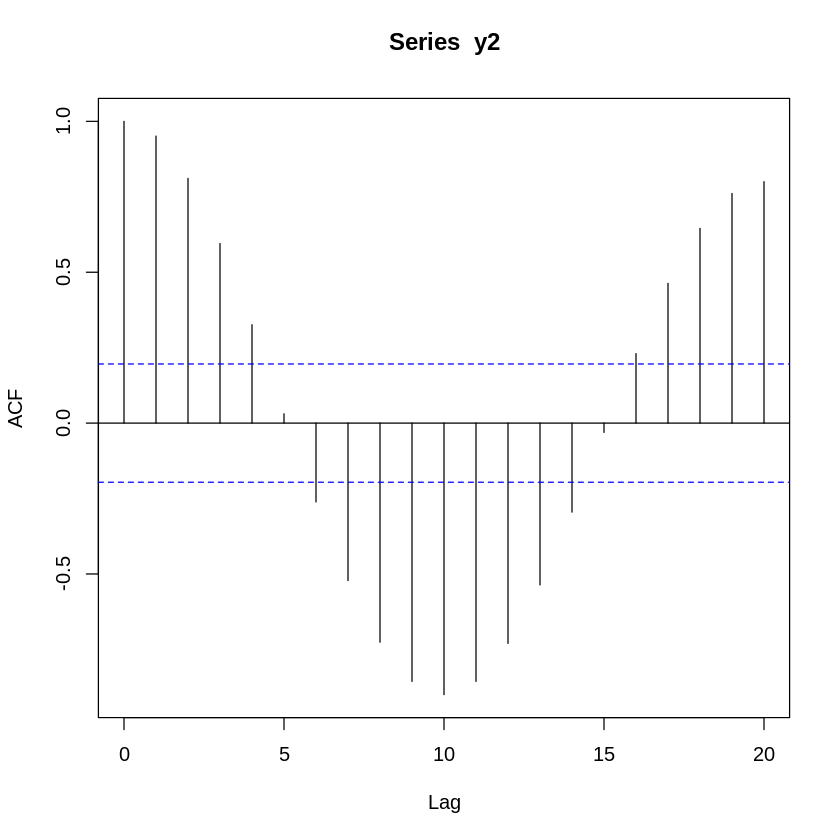

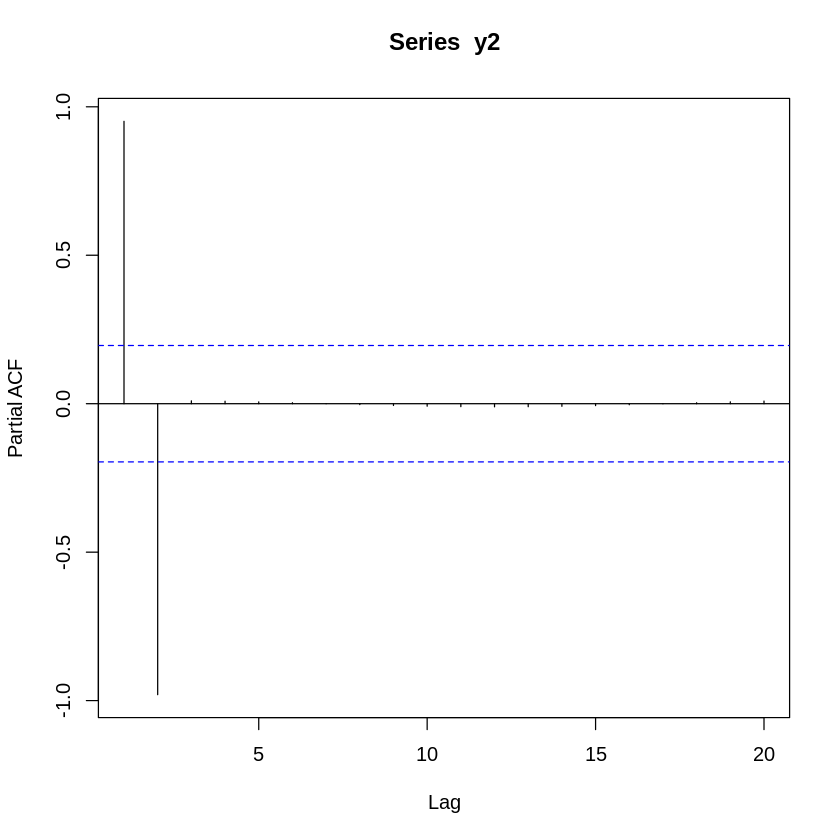

In [26]:
y2 = sin(x * pi / 10)
plot(y2, type = 'b')
acf(y2)
pacf(y2)


*Примечание*: Значение автокорреляционной функции для стационарных данных должно быстро падать к нулю. У нестационарных данных значение ACF при единичном сдвиге всегда будет положительным и большим.


Просуммируем два ряда и построим такие же графики для полученного результата

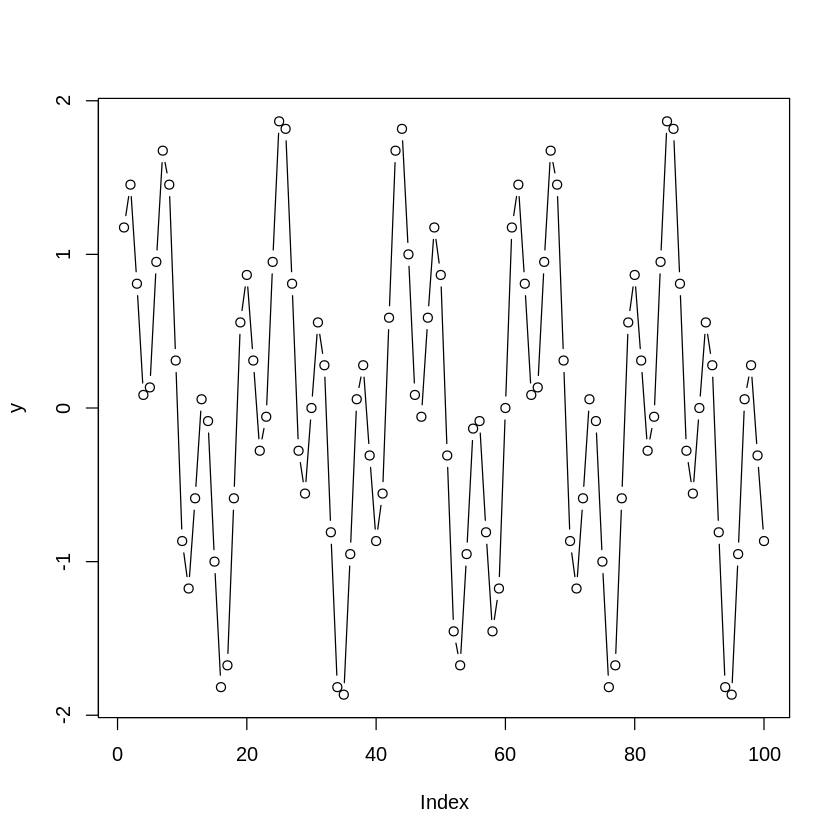

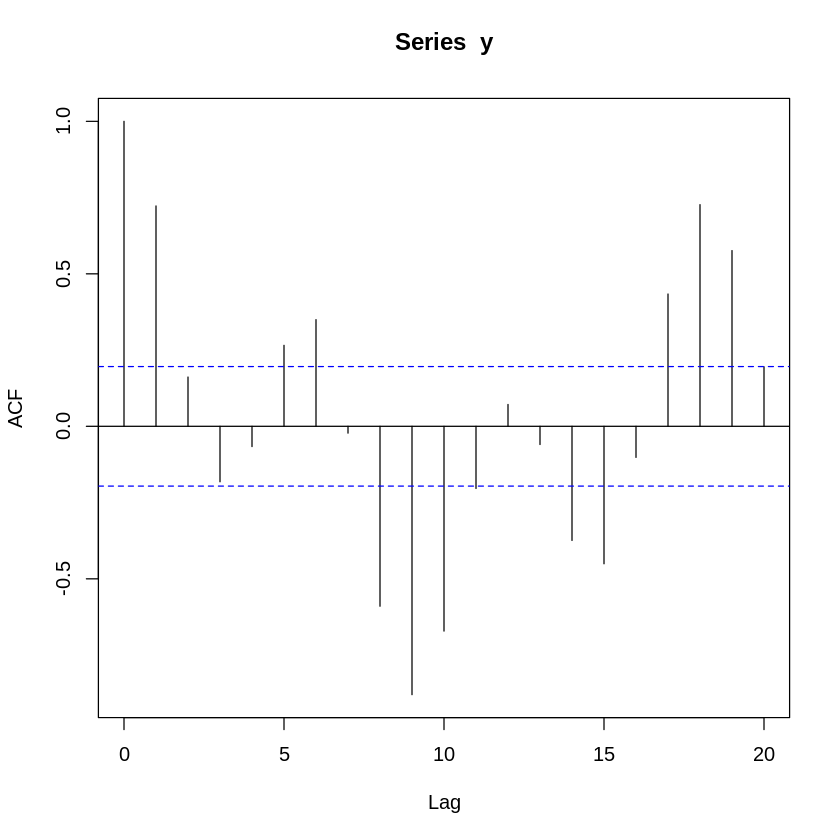

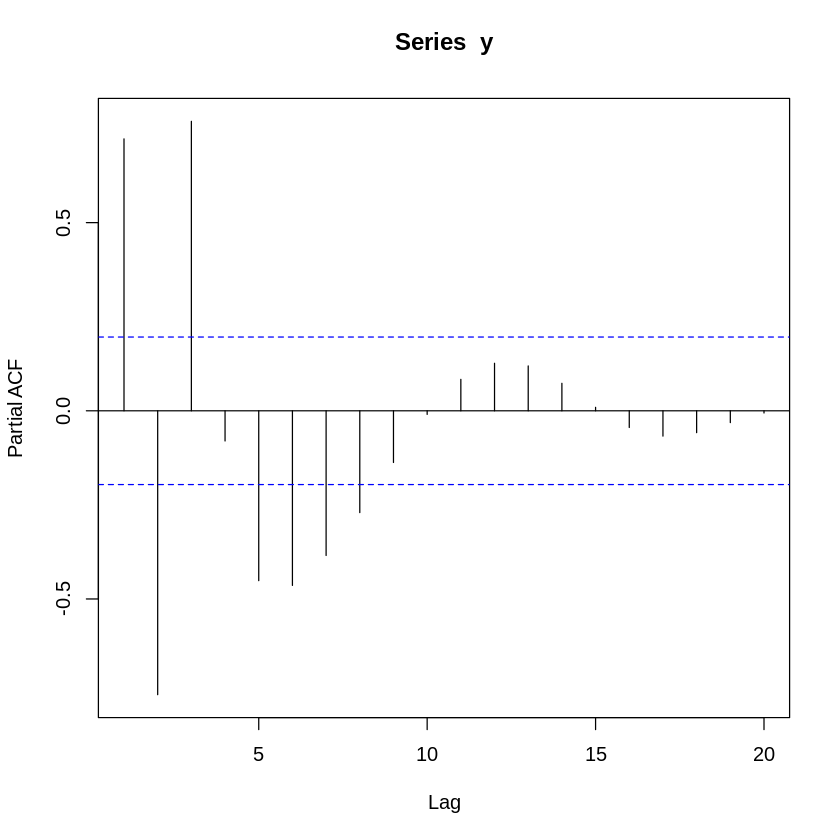

In [27]:
y = y1+y2
plot(y, type = 'b')
acf(y)
pacf(y)

Легко заметить, что график ACF полностью подчиняется упомянутому выше правилу: ACF суммы периодических рядов представляется суммой ACF отдельных рядов. В этом можно наглядно убедиться, изучив последовательность чередующихся положительных и отрицательных участков ACF, коррелирующих с более медленно осциллирующими значениями ACF. Внутри плавных волн отчетливо просматриваются более частые колебания высокочастотной составляющей ACF.

При этом PACF суммы не представлена суммой PACF ее слагаемых. Она достаточно простая для понимания, но чрезвычайно сложная для вычисления или прогнозирования. В нашем случае анализ PACF показывает, что частичная автокорреляция сильнее проявляется в ряду суммы синусоид, чем в любом из исходных рядов. Таким образом, корреляция между точками, сдвинутыми на определенный временной интервал, с учетом значений точек между ними сильнее проявляется в ряду суммы сигналов, чем в исходных рядах. Это вызвано существованием в нем двух разных периодов — любая рассматриваемая точка данных в меньшей степени определяется значениями соседних точек, поскольку ее положение в пределах двухпериодного цикла теперь менее фиксировано из-за колебаний на разных частотах.

Рассмотрим аналогичную ситуацию, но на этот раз с некоторым шумом.

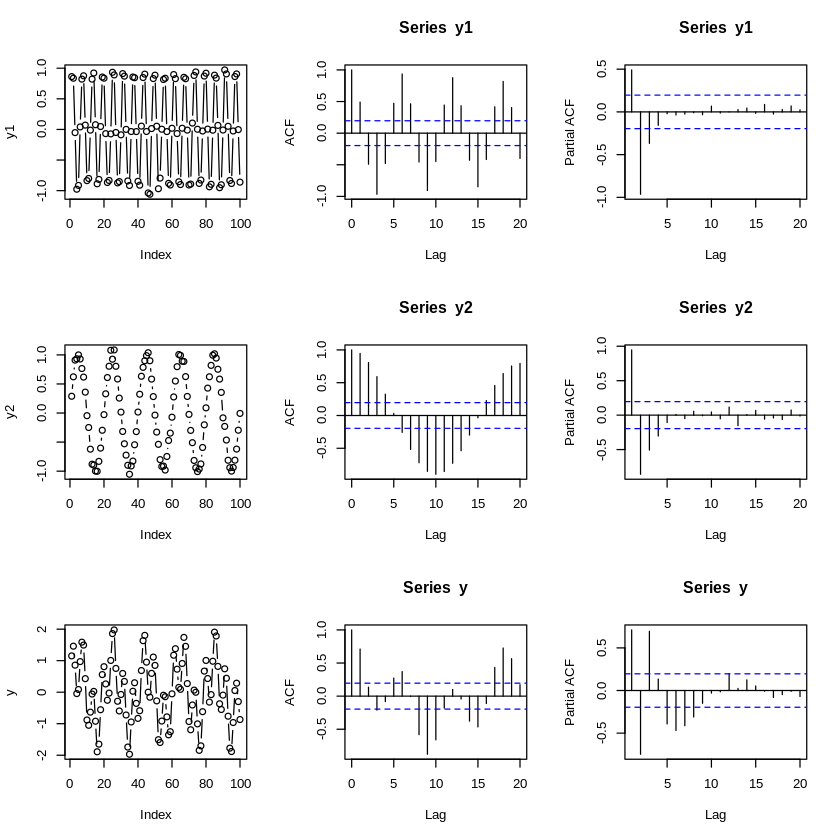

In [28]:
## R
# Матрица графиков 3х3
par(mfrow = c(3, 3))

# Зашумление временных рядов
noise1 = rnorm(100, sd = 0.05)
noise2 = rnorm(100, sd = 0.05)

y1 = y1 + noise1
y2 = y2 + noise2
y = y1 + y2

plot(y1, type = 'b')
acf(y1)
pacf(y1)

plot(y2, type = 'b')
acf(y2)
pacf(y2)

plot(y, type = 'b')
acf(y)
pacf(y)

Наконец, добавим во временные ряды больше шума, чтобы еще сильнее исказить исходные синусоиды. (Пример кода их построения не приводится умышленно — он такой же, как в предыдущем примере, но с заметно большим значением параметра sd функции rnorm.) Как можно видеть, шум создает дополнительные трудности при интерпретации данных, особенно функции pacf Единственное различие между графиками, приведенными на рисунке и предыдущих рисунках, — это большее значение sd для переменных noise.

![](https://drive.google.com/uc?export=view&id=1ID2pmxO2J3xhZtZvByA8Cb0JxSNDfrra)

**Нестационарные данные**

Посмотрим, как бyдyт выглядеть фyнкции acf и pacf для временного ряда с трендом, но лишенного периодических изменений

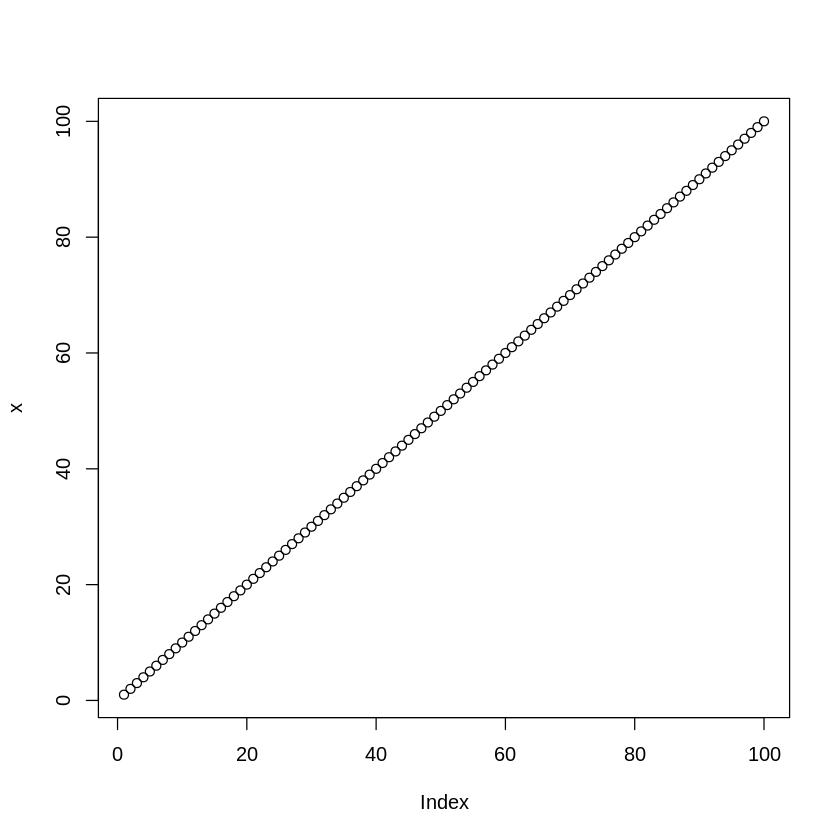

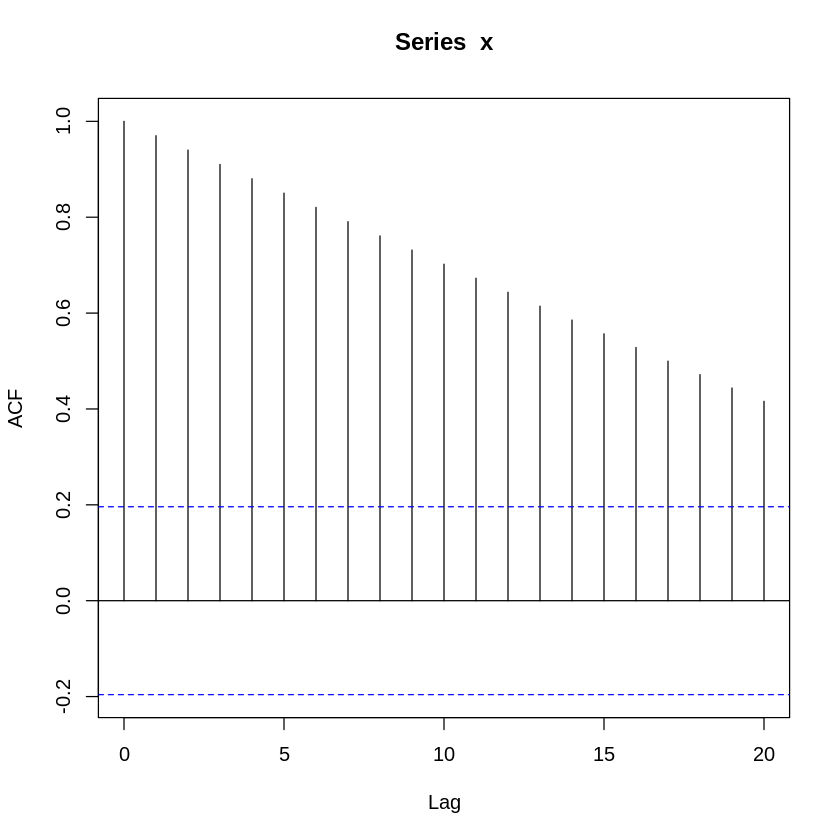

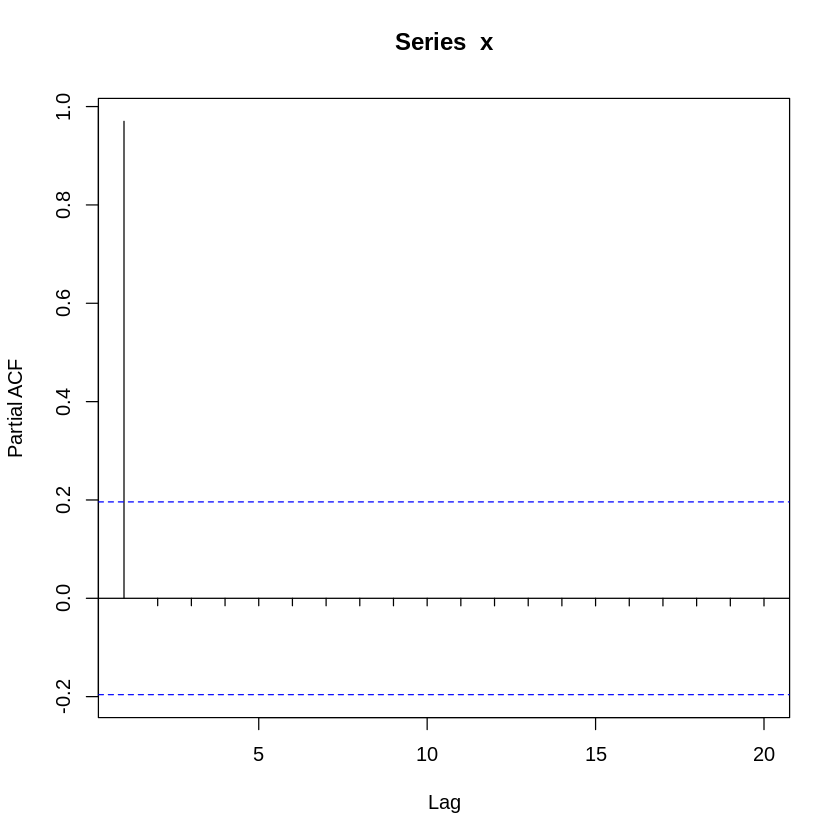

In [29]:
х = 1:100
plot(x)
acf (х)
pacf(х)


В данном случае функция acf совершенно не информативна. Она имеет одно и то же значение для всех возможных сдвигов, что указывает на одинаковую корреляцию на любых временных интервалах. Непонятно, как это нужно трактовать, и больше похоже на случай с совершенно бессмысленным результатом. К счастью, pacf не столь сложна для понимания и предоставляет более важную информацию — единственная значимая корреляция pacf проявляется при единичном сдвиге. Почему так? Да потому, что всю необходимую информацию о ряде на определенный момент времени можно получить по известной предыдущей точке данных. И связано это с тем, что следующая временная точка сдвинута всего на 1 относительно предыдущей точки.

Давайте изучим функции ACF и PACF, рассчитанные для реального набора данных. В качестве примера воспользуемся набором данных AirPassenger. Учитывая приведенные выше рассуждения, попробуйте выяснить причину большого количества “критических” значений в acf и существование их в pacf для больших временных сдвигов (ответ: годовой сезонный цикл различается даже в процессе с трендом).

![](https://drive.google.com/uc?export=view&id=154IR1-mVlxW9Ro7T3uOV-1NQP3Wlg5ub)


2.5 Ложные корреляции

Те, кто плохо знаком с временными рядами, обычно применяют для анализа данных стандартные исследовательские методики, заключающиеся в изучении графиков зависимости двух переменных и их корреляции. Только приступив к исследованию временных рядов и научившись различать взаимосвязи в данных, вы, скорее всего, будете уделять корреляции слишком много внимания.

Занимаясь исследованием данных, вы будете постоянно находить самые разные взаимосвязи и искренне удивляться тому, насколько сильно могут коррелировать данные в, казалось бы, хорошо изученной системе. Рано или поздно удивление сменится сожалением о столь запоздалом переходе к изучению методов анализа временных рядов, открывающих совершенно новые карьерные возможности.

Принявшись наверстывать упущенное и прочитав несколько учебников по анализу временных рядов (наиболее предпочтительный сценарий), вы поделитесь эконометрика. О цикличности экономических процессов экономисты начали задумываться еще в начале XIX века. В качестве причины возникновения таких циклов выбирались самые невероятные внешние факторы, включая появление солнечных пятен (11-летний цикл) или недавно изученные метеорологические изменения (4-летний цикл атмосферных осадков). Они неизменно получали сильно коррелирующие величины даже в отсутствие причинно-следственной гипотезы, объясняющей взаимосвязи в исследуемых данных.

Наряду с этим большинство экономистов и специалистов по статистике, будучи истинными учеными, скептически оценивали полученные результаты. Удни Юл описал проблематику ложных корреляций в статье Why Do We Sometimes Get Nonsense Correlations? (Почему мы получаем бессмысленные корреляции?) (https: //www.jstor.org/stable/2341482). Вскоре она была выделена в отдельную область исследований, которая не только доставляет ученым головную боль, но и радует новыми открытиями. Ложные корреляции остаются важной проблемой, требующей самого пристального изучения и опровержения. Наиболее горячие дискуссии они вызывают в судебных разбирательствах, в которых одна из сторон настаивает на существовании каких-то отношений, а другая всячески их опровергает. Подобным образом попытки дискредитации гипотезы об изменении климата аргументируются проявлением ложных корреляций в данных о выбросах углерода и повышении средней общемировой температуры, что объясняется наличием в них очевидных трендов (спорное утверждение).

Со временем специалисты по экономике выяснили, что ложным корреляциям сильно подвержены данные с явно выраженным трендом. Это можно объяснить следующим образом: динамический временной ряд содержит больше информации, чем стационарный, поэтому у его точек больше возможностей для совместного перемещения.

Кроме трендов, ложные корреляции могут порождаться некоторыми другими общими факторами, описывающими поведение временных рядов.
* Сезонность. Простым примером будет ложная корреляция между объемами продаж хот-догов и количеством утопленников в летний сезон.
* Смещение уровня или наклона графика, вызванное временным изменением режима (приводит к гантелеобразному распределению с бессмысленно высокой корреляцией).
* Кумулятивное суммирование исследуемых величин (этот прием часто применяется в определенных отраслях для представления корреляции в более выгодном свете, чем она проявляется).


*Коинтеграция*

Коинтеграция описывает действительно существующую взаимосвязь между временными рядами. Часто приводимый пример — поведение пьяного пешехода и его собаки. Рассматриваемые по отдельности траектории их движения могут выглядеть как полностью случайные и независимые. На самом деле они никогда не отдаляются слишком далеко друг от друга.

В случае коинтеграции также имеет место сильная корреляция данных. Трудность ее распознавания заключается в определении того, связаны ли между собой процессы или вы наблюдаете ложную корреляцию, — сильная корреляции данных характерна для обоих случаев. Основное различие состоит в том, что в случае ложной корреляции взаимосвязь никак не проявляется, тогда как коинтегрированные временные ряды тесно связаны друг с другом.

Большое количество замечательных примеров ложных корреляций приведено в одном хорошо известном блоге (а теперь уже и книге), и я хотел бы поделиться с вами одним из приведенных в нем примеров (рис. 2.17). Всякий раз, получив предпосылки к распознаванию в данных сильных взаимосвязей, постарайтесь найти убедительные тому противоречия, подобные явно выраженным трендам.

![](https://drive.google.com/uc?export=view&id=12mcrOi-7D7p1ZgUVFVfPf0MHGvVLMtgO)

*Рис. 2.17. Некоторые ложные корреляции выглядят на удивление убедительно. График заимствован с сайта Tyler Vigen, посвященного проблематике ложной корреляции (https: //perma.cc/6UYH-FPBX)*
